In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [5]:
# There is a ".git folder" in the parent directory.
# THerefore, force "here" to create a here file in current dir:

# here::set_here()

# Now, restart kernel and it will work.

# Continue with here::here() as usual.

In [6]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2024_Garcia-Bonilla_et_al/22_03_25"

In [7]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/asn7yfxccx9hqi4afrnw685xw6c6382z-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [8]:
my_seurat_extend_scCustomize_lib  <- 
    "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/seuratExtend_scCustomize/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [9]:
.libPaths(new = my_seurat_extend_scCustomize_lib, include.site = FALSE)

In [10]:
.libPaths()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/seuratExtend_scCustomize/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [11]:
library(magrittr)

In [14]:
here::here('..', '12_06_24', 'R_Objects') %>% 
list.files() %>% stringr::str_subset('RDS') %>% print()

 [1] "EC_eGRN_min5_eGRN_Pando_object.RDS"                   
 [2] "EC_eGRN_min5_eGRN_meta_DF.RDS"                        
 [3] "GBonilla_seurat_12_08_24.RDS"                         
 [4] "GBonilla_seurat_BAM.RDS"                              
 [5] "GBonilla_seurat_BAM_processed.RDS"                    
 [6] "GBonilla_seurat_Bc.RDS"                               
 [7] "GBonilla_seurat_Bc_processed.RDS"                     
 [8] "GBonilla_seurat_DC.RDS"                               
 [9] "GBonilla_seurat_DC_processed.RDS"                     
[10] "GBonilla_seurat_EC.RDS"                               
[11] "GBonilla_seurat_EC_processed.RDS"                     
[12] "GBonilla_seurat_Epi.RDS"                              
[13] "GBonilla_seurat_Epi_processed.RDS"                    
[14] "GBonilla_seurat_Gran.RDS"                             
[15] "GBonilla_seurat_Gran_processed.RDS"                   
[16] "GBonilla_seurat_MC.RDS"                               
[17] "GBonilla_seurat_MC

In [15]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [16]:
GBonilla_unprocessed_seurat <- 
    readRDS(here::here('..', 
                       '12_06_24', 
                       'R_Objects', 
                       'GBonilla_seurat_mito_ribo_Gm_filtered_unprocessed.RDS'))

In [17]:
GBonilla_unprocessed_seurat

An object of class Seurat 
14316 features across 43269 samples within 1 assay 
Active assay: RNA (14316 features, 0 variable features)
 1 layer present: counts

==============================================================

Cell number is same with the AUC score matrix of TF-Regulons.

==============================================================

In [18]:
GBonilla_unprocessed_seurat@active.ident %>% head()

BRS02R1GGGATCGATATG       BRS02R1ATTCAATATCAC       BRS02R1ATTTCCGTCCGC 
Garcia-Bonilla_et_al_2023 Garcia-Bonilla_et_al_2023 Garcia-Bonilla_et_al_2023 
      BRS02R1TAGCGCGAGACC       BRS02R1GCTGATTATTTG       BRS02R1CTATCTCTCGAA 
Garcia-Bonilla_et_al_2023 Garcia-Bonilla_et_al_2023 Garcia-Bonilla_et_al_2023 
Levels: Garcia-Bonilla_et_al_2023

In [26]:
options(repr.plot.width = 15, repr.plot.height = 7)

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


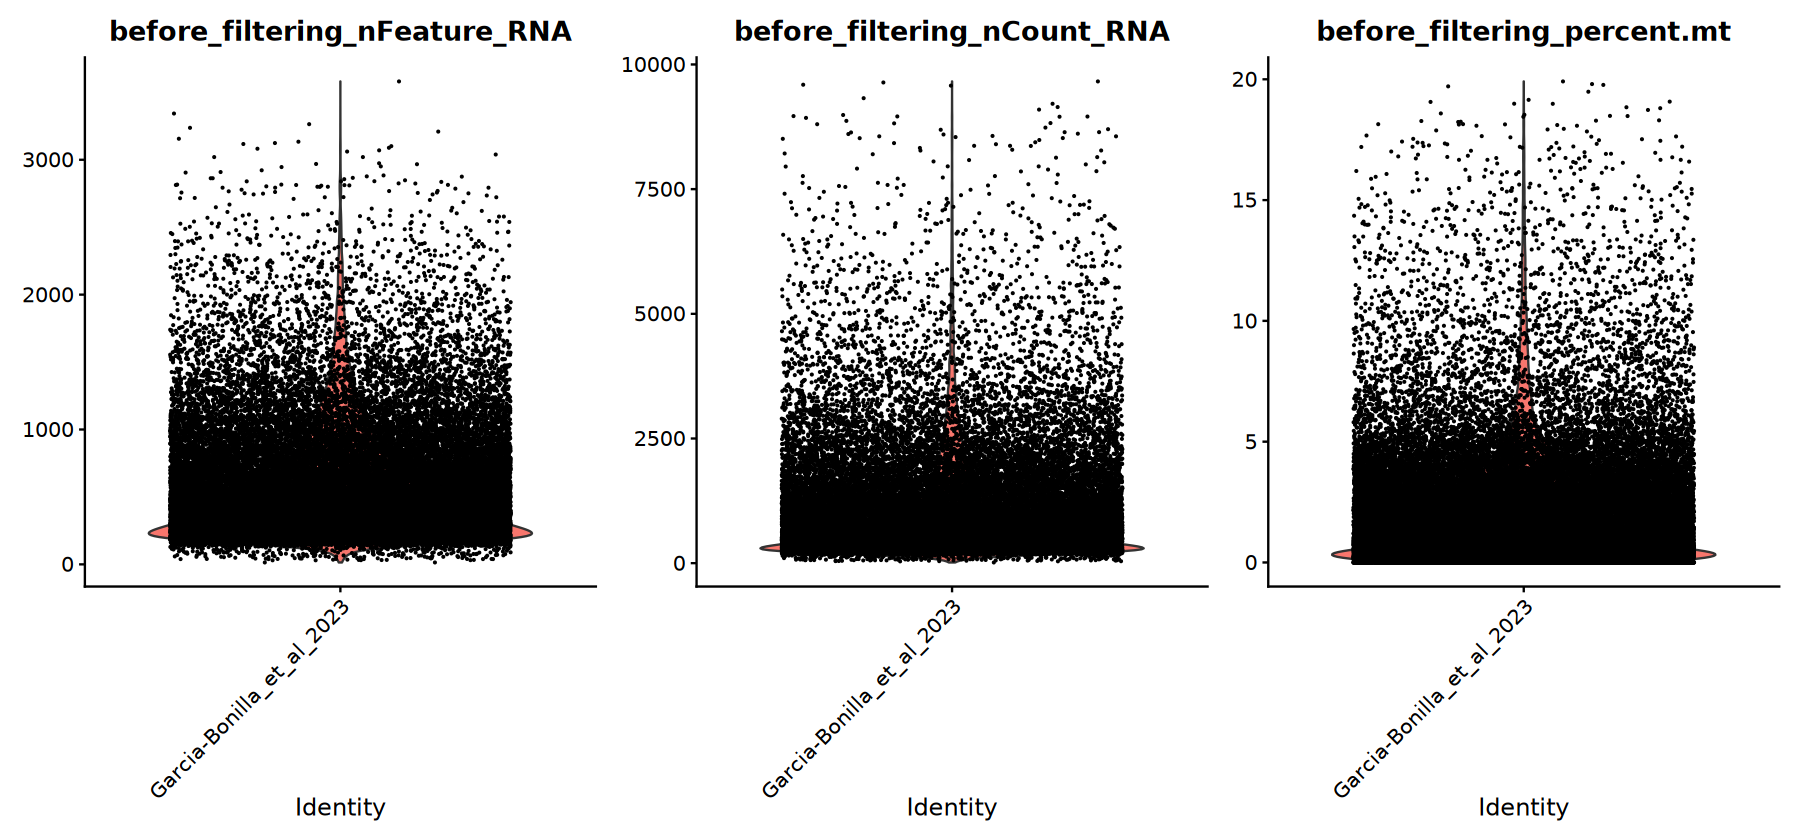

In [28]:
VlnPlot(GBonilla_unprocessed_seurat, features = c("before_filtering_nFeature_RNA", "before_filtering_nCount_RNA", "before_filtering_percent.mt"), ncol = 3, pt.size = 0.1)

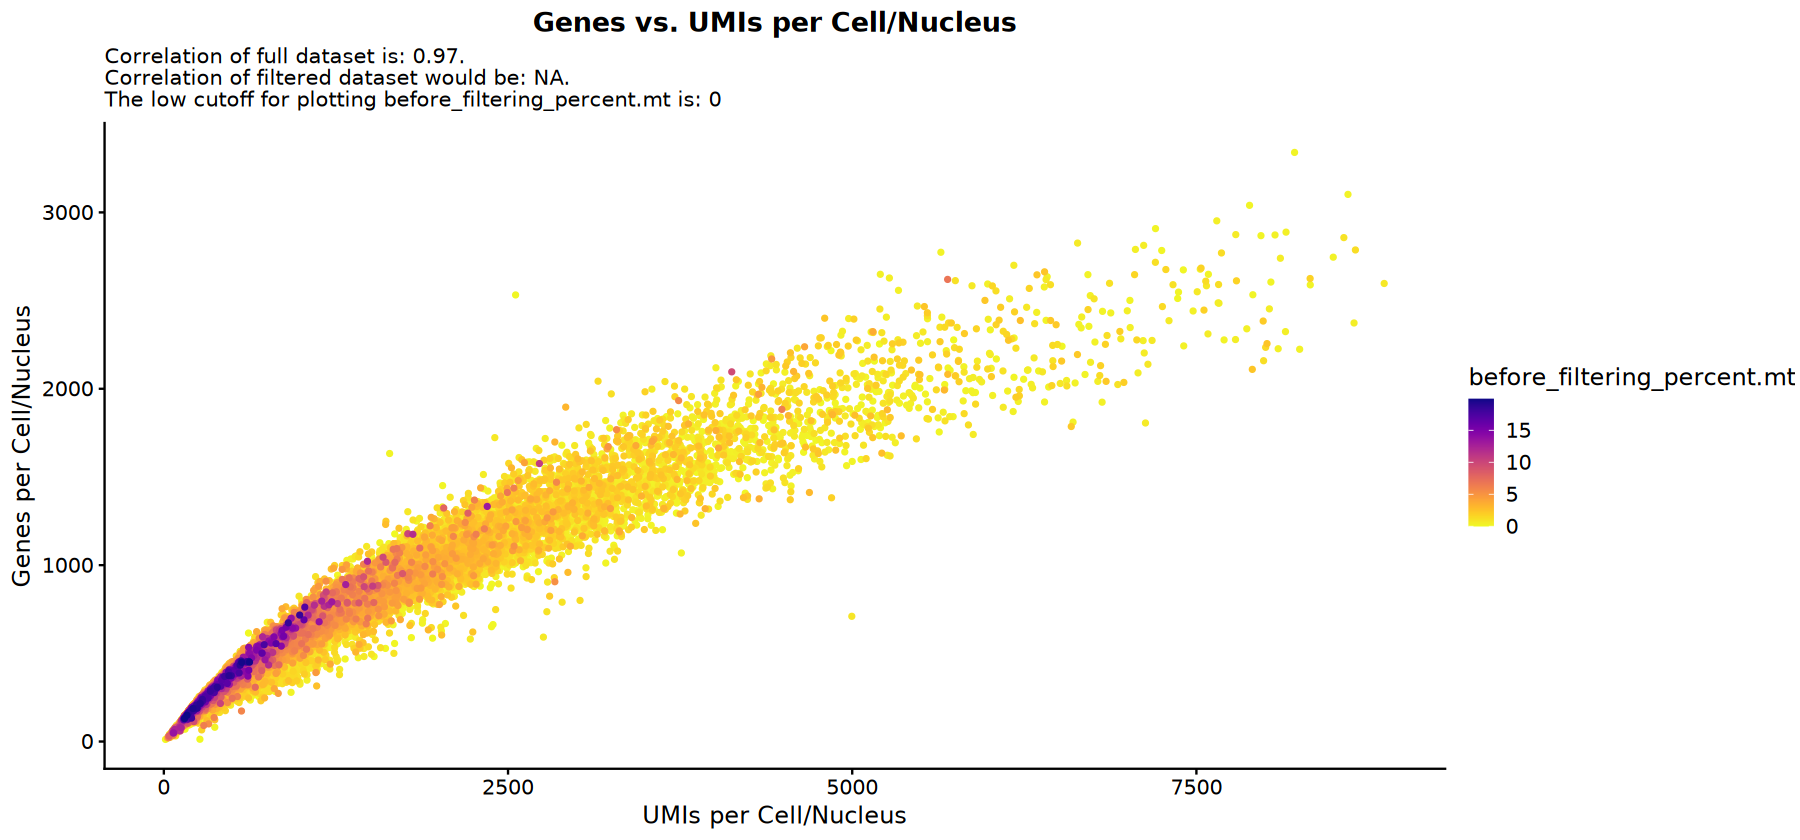

In [35]:
scCustomize::QC_Plot_UMIvsGene(seurat_object = GBonilla_unprocessed_seurat, meta_gradient_name = "before_filtering_percent.mt")


NOTE: FeatureScatter_scCustom returns split plots as layout of all plots each
with their own axes as opposed to Seurat which returns with shared x or y axis.
To return to Seurat behvaior set `split_seurat = TRUE`.

-----This message will be shown once per session.-----


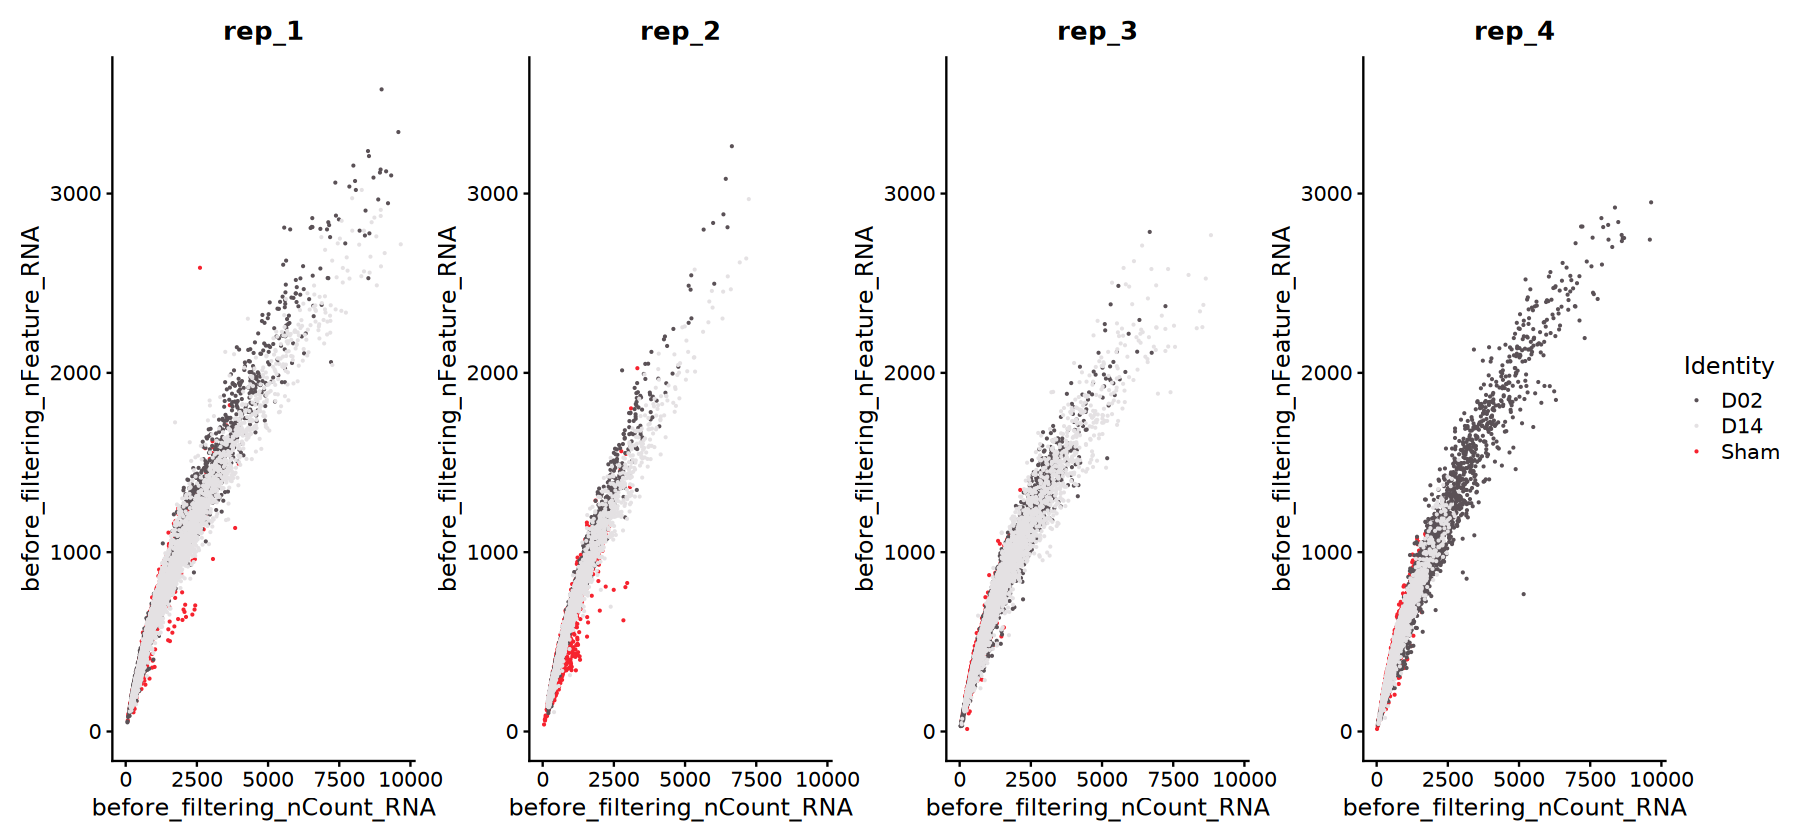

In [37]:
scCustomize::FeatureScatter_scCustom(GBonilla_unprocessed_seurat, feature1 = "before_filtering_nCount_RNA", feature2 = "before_filtering_nFeature_RNA", group.by = 'treatment', shuffle = TRUE, split.by = 'Replicate', num_columns = 4)

In [38]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


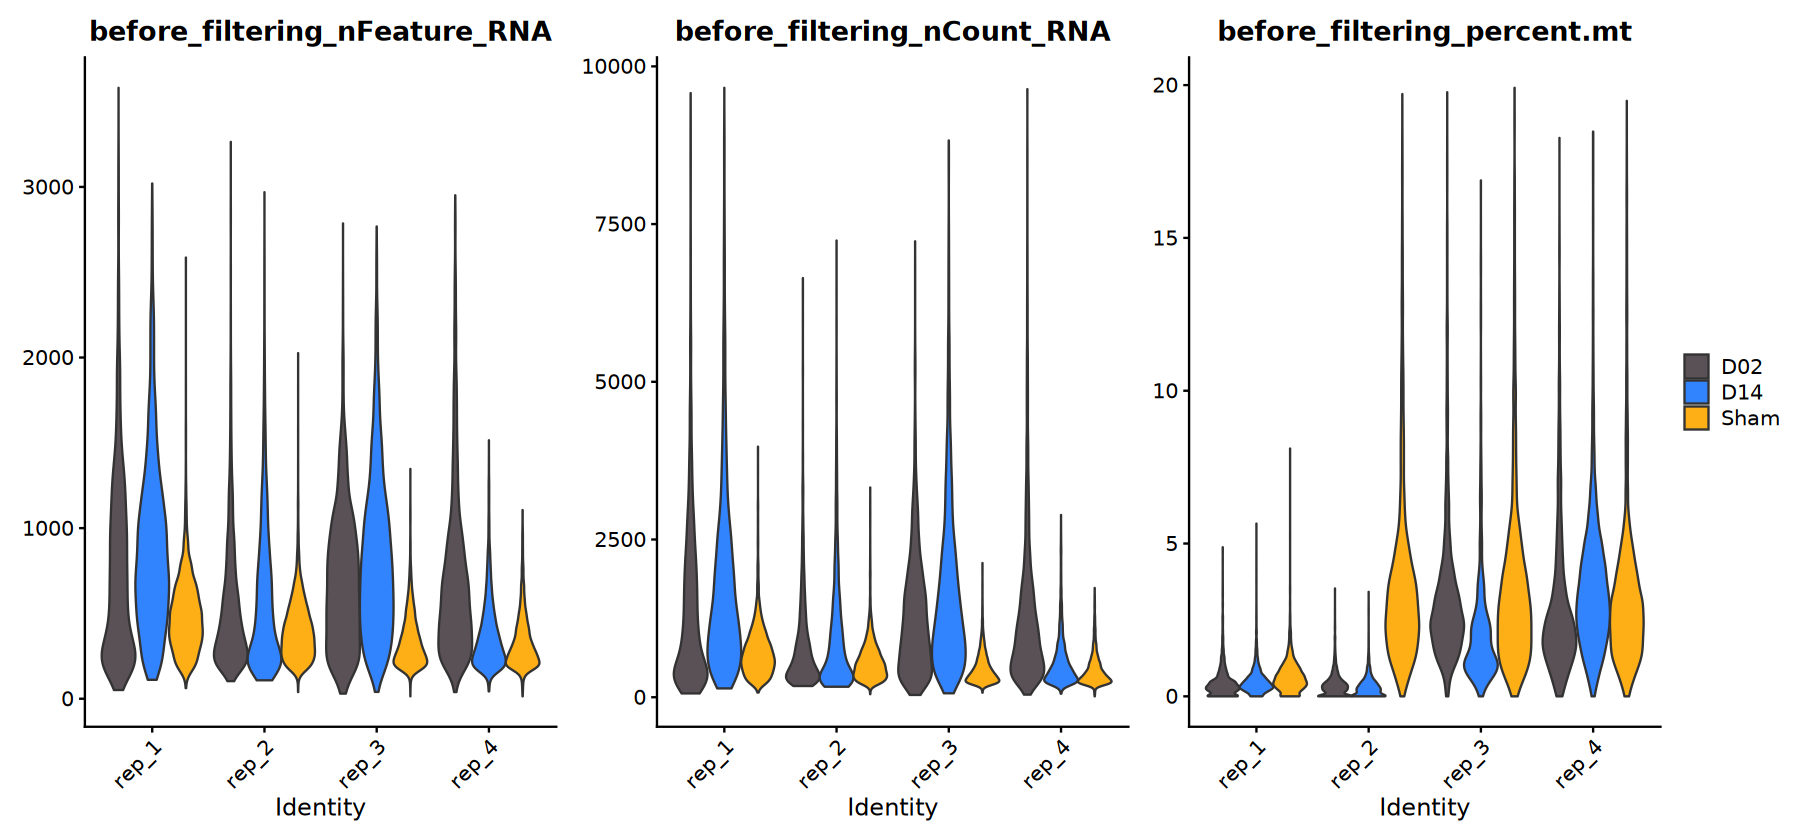

In [40]:
VlnPlot(GBonilla_unprocessed_seurat, 
        features = c("before_filtering_nFeature_RNA", "before_filtering_nCount_RNA", "before_filtering_percent.mt"), 
        split.by = "treatment", 
        group.by = 'Replicate' , 
        pt.size = 0, 
        cols = my_colours[c(1,5, 6)]) +  
        ggplot2::theme(legend.position = "right")

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


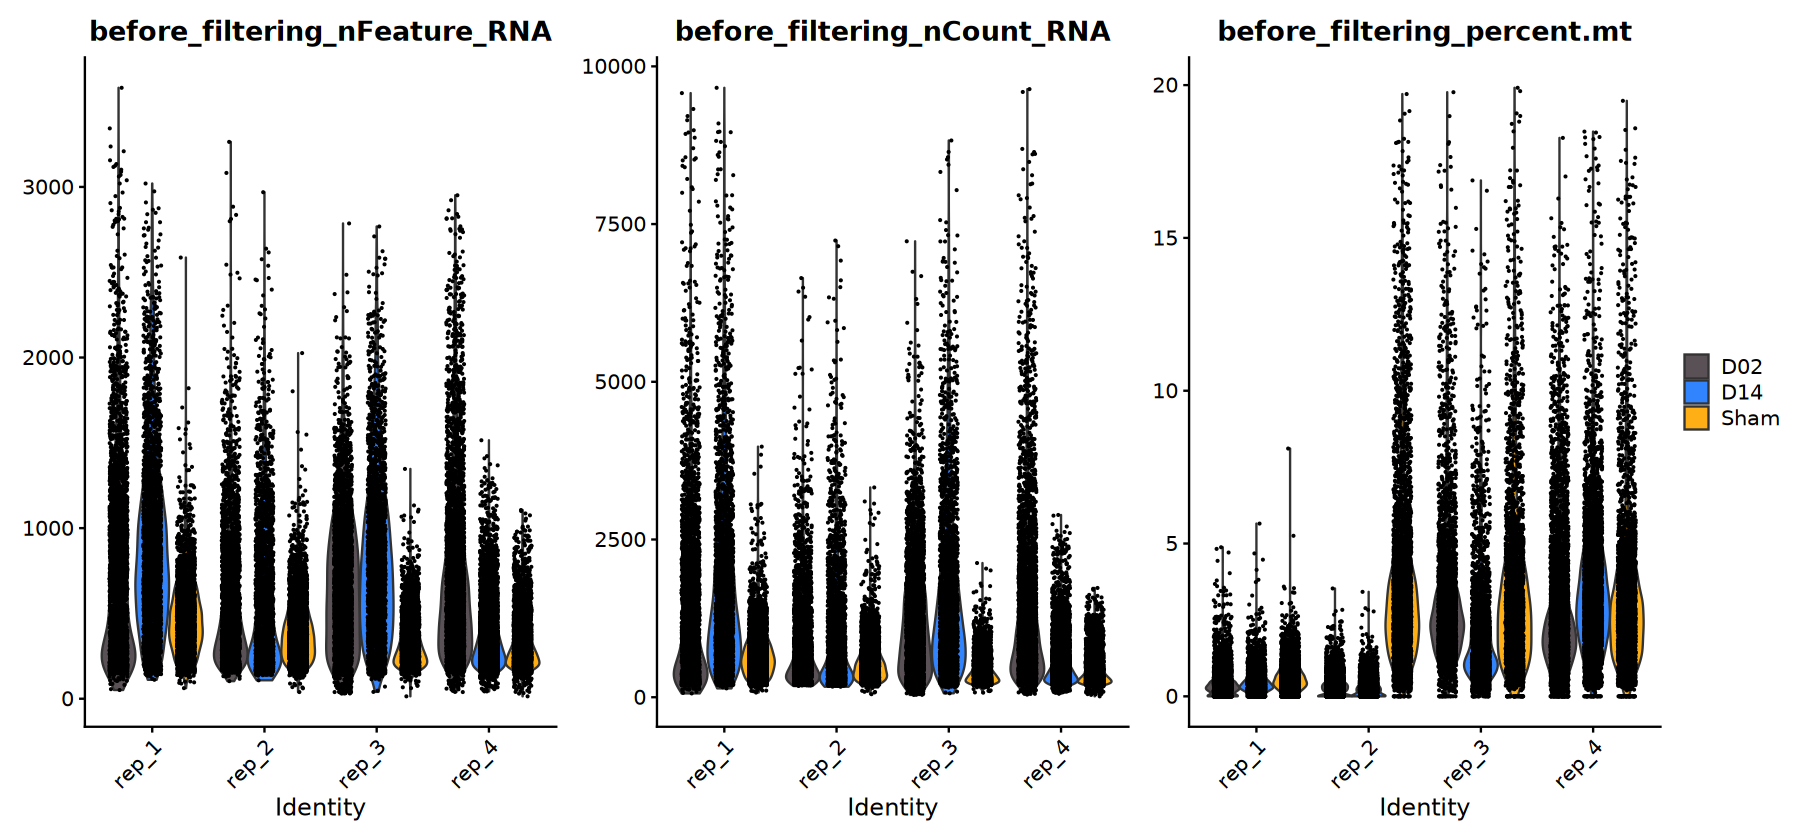

In [41]:
VlnPlot(GBonilla_unprocessed_seurat, 
        features = c("before_filtering_nFeature_RNA", "before_filtering_nCount_RNA", "before_filtering_percent.mt"), 
        split.by = "treatment", 
        group.by = 'Replicate' , 
        pt.size = 0.1, 
        cols = my_colours[c(1,5, 6)]) +  
        ggplot2::theme(legend.position = "right")

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


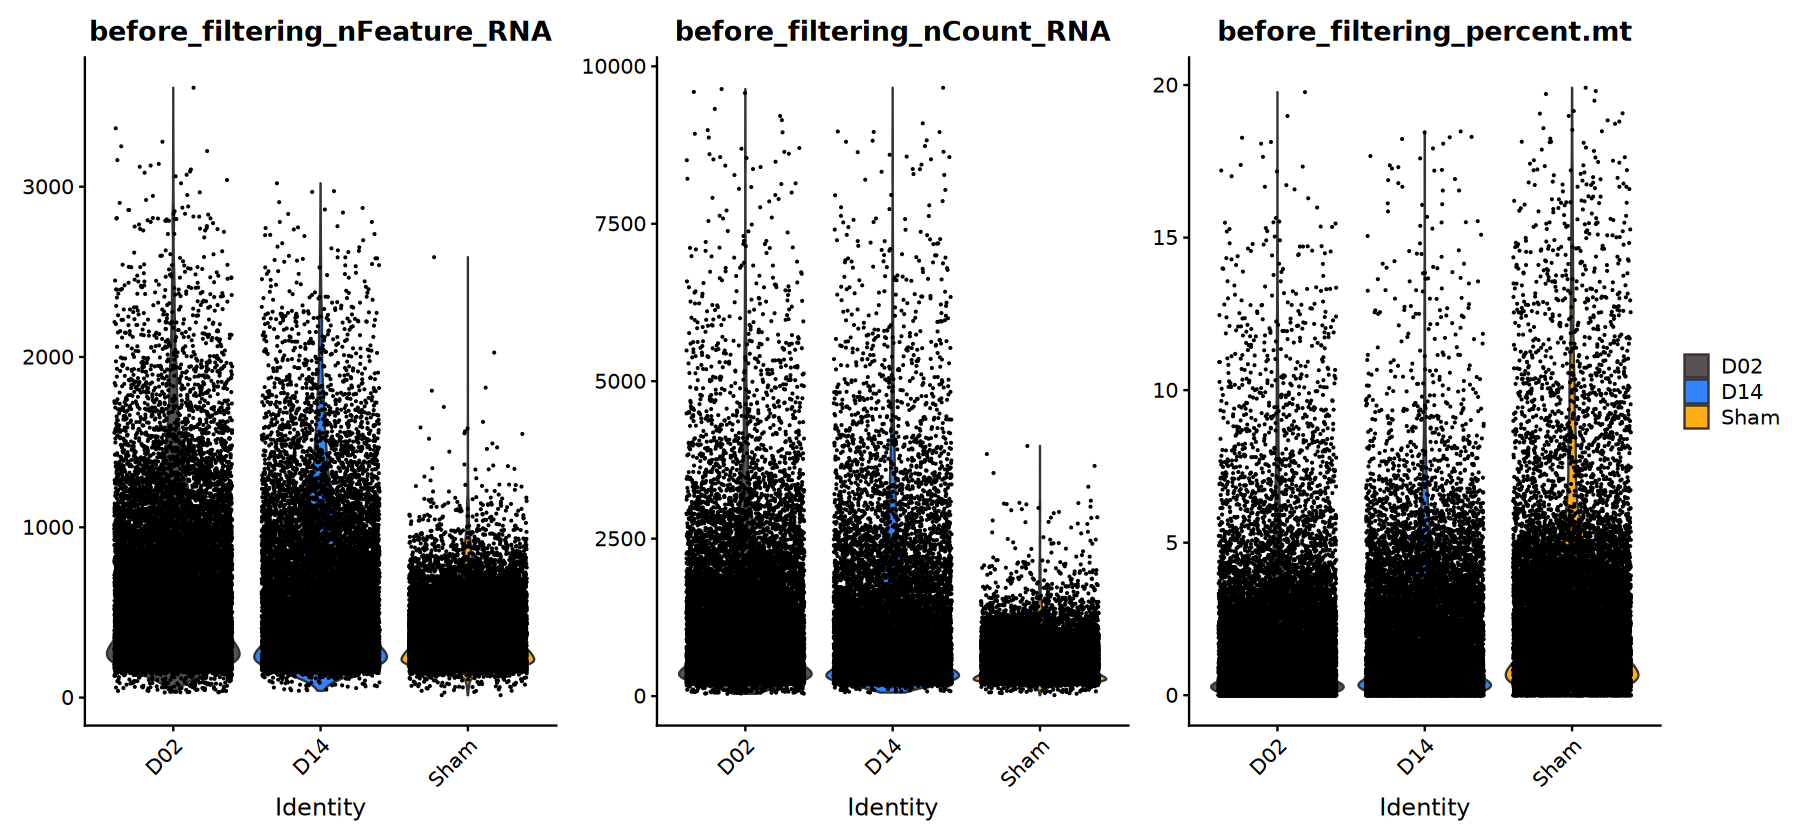

In [42]:
VlnPlot(GBonilla_unprocessed_seurat, 
        features = c("before_filtering_nFeature_RNA", "before_filtering_nCount_RNA", "before_filtering_percent.mt"), 
        group.by = 'treatment' , 
        pt.size = 0.1, 
        cols = my_colours[c(1,5, 6)]) +  
        ggplot2::theme(legend.position = "right")

In [43]:
GBonilla_unprocessed_seurat@meta.data  %>% head() %>% print()

                                   orig.ident nCount_RNA nFeature_RNA
BRS02R1GGGATCGATATG Garcia-Bonilla_et_al_2023       2840          906
BRS02R1ATTCAATATCAC Garcia-Bonilla_et_al_2023       3759         1069
BRS02R1ATTTCCGTCCGC Garcia-Bonilla_et_al_2023       3246         1656
BRS02R1TAGCGCGAGACC Garcia-Bonilla_et_al_2023       3766         1383
BRS02R1GCTGATTATTTG Garcia-Bonilla_et_al_2023       2691         1401
BRS02R1CTATCTCTCGAA Garcia-Bonilla_et_al_2023       2268          892
                    before_filtering_nCount_RNA before_filtering_nFeature_RNA
BRS02R1GGGATCGATATG                        3065                           962
BRS02R1ATTCAATATCAC                        3844                          1135
BRS02R1ATTTCCGTCCGC                        3655                          1820
BRS02R1TAGCGCGAGACC                        3972                          1492
BRS02R1GCTGATTATTTG                        2951                          1520
BRS02R1CTATCTCTCGAA                       

In [44]:
# Normalize:

GBonilla_seurat <- NormalizeData(GBonilla_unprocessed_seurat, 
                                 normalization.method = "LogNormalize", 
                                 scale.factor = 10000)

Normalizing layer: counts



In [45]:
GBonilla_seurat

An object of class Seurat 
14316 features across 43269 samples within 1 assay 
Active assay: RNA (14316 features, 0 variable features)
 2 layers present: counts, data

In [46]:
rm(GBonilla_unprocessed_seurat)

==========================================================

Now, here, I will explore SeuratExtend package's functions on my data.

In [47]:
GBonilla_seurat$treatment %>% table()

.
  D02   D14  Sham 
14823 13417 15029 

In [48]:
GBonilla_seurat$main_cell_types %>% table()

.
               B<U+2009>cells Border-associated macrophages 
                          446                          1158 
            Endothelial cells                       T cells 
                         5880                          1290 
         Vascular Mural Cells               dendritic cells 
                          136                          3278 
        epithelial-like cells                  granulocytes 
                           75                          1230 
                   mast cells                     microglia 
                           43                         18737 
        myeloid-derived cells          natural killer cells 
                        10441                           484 
             oligodendrocytes 
                           71 

I will fix "B cells" names.

In [55]:
(GBonilla_seurat$main_cell_types == "B\u2009cells") %>% 
table()

.
FALSE  TRUE 
42823   446 

In [56]:
GBonilla_seurat$main_cell_types[GBonilla_seurat$main_cell_types == "B\u2009cells"] %>% 
table()

.
B<U+2009>cells 
         446 

In [57]:
GBonilla_seurat$main_cell_types[GBonilla_seurat$main_cell_types == "B\u2009cells"] <- 'B cells'

In [58]:
GBonilla_seurat$main_cell_types %>% table()

.
                      B cells Border-associated macrophages 
                          446                          1158 
            Endothelial cells                       T cells 
                         5880                          1290 
         Vascular Mural Cells               dendritic cells 
                          136                          3278 
        epithelial-like cells                  granulocytes 
                           75                          1230 
                   mast cells                     microglia 
                           43                         18737 
        myeloid-derived cells          natural killer cells 
                        10441                           484 
             oligodendrocytes 
                           71 

In [60]:
# The following is the slot in which I will
# store analysis results.

GBonilla_seurat@misc

list()

In [61]:
library(SeuratExtend)

Loading required package: SeuratExtendData



In [62]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [70]:
# Our data is from mouse.

In [71]:
options(max.print = 12, spe = "mouse")

In [75]:
pbmc <- GBonilla_seurat %>% 
        subset(subset = main_cell_types %in% 'oligodendrocytes')

In [76]:
pbmc

An object of class Seurat 
14316 features across 71 samples within 1 assay 
Active assay: RNA (14316 features, 0 variable features)
 2 layers present: counts, data

In [77]:
pbmc <- 
    GeneSetAnalysisGO(pbmc, 
                      parent = "immune_system_process", 
                      nCores = 1)

2025-03-22 16:55:36.92622 Retrieve GO database

2025-03-22 16:55:37.042257 Start filtering 415 gene set(s): n(Genes) >= 1, n(Genes) <= Inf, at least 40% of genes found in the datasets

2025-03-22 16:55:37.230734 381 gene set(s) passed the filter

2025-03-22 16:55:37.235144 Build AUC Rank

2025-03-22 16:55:37.3266 Calculating 381 gene set(s)

Genes in the gene sets NOT available in the dataset: 
	GO:0002376: 	978 (34% of 2850)
	GO:0001776: 	8 (7% of 112)
	GO:0002200: 	8 (10% of 78)
	GO:0002252: 	330 (35% of 950)
	GO:0002253: 	243 (42% of 585)
	GO:0002262: 	30 (17% of 180)
	GO:0002440: 	220 (53% of 416)
	GO:0002507: 	4 (14% of 28)
	GO:0002520: 	245 (23% of 1052)
	GO:0006955: 	726 (40% of 1804)
	GO:0019882: 	27 (23% of 117)
	GO:0031294: 	2 (6% of 31)
	GO:0045058: 	8 (14% of 56)
	GO:0045321: 	336 (32% of 1062)
	GO:0050900: 	50 (15% of 343)
	GO:0001780: 	1 (4% of 24)
	GO:0002260: 	4 (5% of 78)
	GO:0033023: 	1 (20% of 5)
	GO:0035702: 	1 (33% of 3)
	GO:0002562: 	7 (10% of 70)
	GO:0002566: 	2 

In [82]:
# check new AUCell layer:

pbmc@misc$AUCell %>% head()

$cells_rankings
                cells
genes            BRS02R1ATAGTATCTAAT BRS02R1CCTTGTACCTAC BRS02R2ACCCCCAGAGTT
                cells
genes            BRS02R2GCGACGCTAACC BRS02R2CACCGACAGATA BRS02R2ATCTTCGTATGT
                cells
genes            BRS02R2GGTGCTACGTCT BRS02R2CGAGGCCACCCG BRS02R2TAAGCTCGATCG
                cells
genes            BRS02R2TTACATTACCTA BRS02R2GGTAGTACGCCG BRS02R2GACTTCATCGAC
                cells
genes            BRS02R2ACAAGAACGAGA BRS02R2AAATAATCCTCC BRS02R3GAGATTTCATCC
                cells
genes            BRS02R3GCCGTGGTAACG BRS02R3CGGGTATATATG BRS02R3CGACACCCTTCA
                cells
genes            BRS02R3TGCCGCACAGCT BRS02R3TCAAGTCCCGAC BRS02R3AGGTAATGCCCT
                cells
genes            BRS02R4ACGCCACGTCGA BRS02R4AGATAACCTTCA BRS02R4GCGACATCGCAC
                cells
genes            BRS02R4GGGCTCTGGGAC BRS02R4AGGGAGATGGGG BRS02R4GTGCTTGCTCGC
                cells
genes            BRD02R1CAGCATGCGGCT BRD02R1GAGCTGCAGTCC BRD02R1CGACCGTCAACC
                cells
genes            BRD02R2CAATATTTAAGG BRD02R2TCTCATTTATTG BRD02R2CAGACAACAACT
                cells
genes            BRD02R2CCGTCCAGGTGT BRD02R2GGTGGTGCCTAG BRD02R3TGGGCGCATTGG
                cells
genes            BRD02R3ATCGTAATCCAA BRD02R3GCCGTGGGTACA BRD02R3ATTTCCATGGGG
                cells
genes            BRD02R3GGTCATCGGCGT BRD02R3GATTCGGCCATT BRD02R3ATCGAAGGGAGG
                cells
genes            BRD02R3AAGAAGACGCTG BRD02R3ATAGAACTTTCC BRD14R1CCTTAACTGAGT
                cells
genes            BRD14R1TCTATAGGTTAT BRD14R1CCGAAATGTCTA BRD14R1TTGTCCCCTGTT
                cells
genes            BRD14R1GGCAAAGTTATC BRD14R1TAGTAGTAGAGA BRD14R1TAAACGAGATGC
                cells
genes            BRD14R1GGTTCAAGTGTT BRD14R1GGTAGAGACACC BRD14R1CGAACGCGGCGT
                cells
genes            BRD14R1GATAGTATGCGT BRD14R2GAAATCATACTC BRD14R2ACGTGCAACATG
                cells
genes            BRD14R2AATTGATTTATG BRD14R2TTTCATTGAACC BRD14R2GAAAAAGAAGAG
                cells
genes            BRD14R3TGTGTCCGCACT BRD14R3CCGAGGACTTAA BRD14R3GTATCCTGCGTC
                cells
genes            BRD14R4TTGCTTACCTTC BRD14R4GTTCTCGGCCAT BRD14R4CCCCGTAGGGCA
                cells
genes            BRD14R4CCCTCTTCATAT BRD14R4CTATCATCAACT BRD14R4AAGGGCTCCCAG
                cells
genes            BRD14R4AGGGACATCAAT BRD14R4ATATCGCCCACA
 [ reached getOption("max.print") -- omitted 14316 rows ]

$GO
$GO$immune_system_process
            cells
gene sets    BRS02R1ATAGTATCTAAT BRS02R1CCTTGTACCTAC BRS02R2ACCCCCAGAGTT
            cells
gene sets    BRS02R2GCGACGCTAACC BRS02R2CACCGACAGATA BRS02R2ATCTTCGTATGT
            cells
gene sets    BRS02R2GGTGCTACGTCT BRS02R2CGAGGCCACCCG BRS02R2TAAGCTCGATCG
            cells
gene sets    BRS02R2TTACATTACCTA BRS02R2GGTAGTACGCCG BRS02R2GACTTCATCGAC
            cells
gene sets    BRS02R2ACAAGAACGAGA BRS02R2AAATAATCCTCC BRS02R3GAGATTTCATCC
            cells
gene sets    BRS02R3GCCGTGGTAACG BRS02R3CGGGTATATATG BRS02R3CGACACCCTTCA
            cells
gene sets    BRS02R3TGCCGCACAGCT BRS02R3TCAAGTCCCGAC BRS02R3AGGTAATGCCCT
            cells
gene sets    BRS02R4ACGCCACGTCGA BRS02R4AGATAACCTTCA BRS02R4GCGACATCGCAC
            cells
gene sets    BRS02R4GGGCTCTGGGAC BRS02R4AGGGAGATGGGG BRS02R4GTGCTTGCTCGC
            cells
gene sets    BRD02R1CAGCATGCGGCT BRD02R1GAGCTGCAGTCC BRD02R1CGACCGTCAACC
            cells
gene sets    BRD02R2CAATATTTAAGG BRD02R2TCTCATTTATTG BRD02R2CAGACAACAACT
            cells
gene sets    BRD02R2CCGTCCAGGTGT BRD02R2GGTGGTGCCTAG BRD02R3TGGGCGCATTGG
            cells
gene sets    BRD02R3ATCGTAATCCAA BRD02R3GCCGTGGGTACA BRD02R3ATTTCCATGGGG
            cells
gene sets    BRD02R3GGTCATCGGCGT BRD02R3GATTCGGCCATT BRD02R3ATCGAAGGGAGG
            cells
gene sets    BRD02R3AAGAAGACGCTG BRD02R3ATAGAACTTTCC BRD14R1CCTTAACTGAGT
            cells
gene sets    BRD14R1TCTATAGGTTAT BRD14R1CCGAAATGTCTA BRD14R1TTGTCCCCTGTT
            cells
gene sets    BRD14R1GGCAAAGTTATC BRD14R1TAGTAGTAGAGA BRD14R1TAAAC

In [91]:
pbmc@misc$AUCell$cells_rankings[1:5, 1:5]

cells
genes           BRS02R1ATAGTATCTAAT BRS02R1CCTTGTACCTAC BRS02R2ACCCCCAGAGTT
  0610009B22Rik 11290                6532                6348              
  0610009E02Rik  2457                5580                2372              
               cells
genes           BRS02R2GCGACGCTAACC BRS02R2CACCGACAGATA
  0610009B22Rik 11082                3014              
  0610009E02Rik   991               12938              
 [ reached getOption("max.print") -- omitted 3 rows ]

In [93]:
pbmc@misc$AUCell$GO$immune_system_process[1:5, 1:5]

cells
gene sets    BRS02R1ATAGTATCTAAT BRS02R1CCTTGTACCTAC BRS02R2ACCCCCAGAGTT
  GO:0002376 0.18468180          0.12470993          0.116251905        
  GO:0001776 0.01996986          0.01628891          0.008129963        
            cells
gene sets    BRS02R2GCGACGCTAACC BRS02R2CACCGACAGATA
  GO:0002376 0.15966715          0.126968004        
  GO:0001776 0.01301374          0.009941453        
 [ reached getOption("max.print") -- omitted 3 rows ]

In [94]:
matr <- pbmc@misc$AUCell$GO$immune_system_process

In [95]:
matr <- RenameGO(matr)

In [96]:
head(matr, 2:3)

cells
gene sets                                  BRS02R1ATAGTATCTAAT
  GO:0002376 immune system process (2850g) 0.18468180         
  GO:0001776 leukocyte homeostasis (112g)  0.01996986         
                                          cells
gene sets                                  BRS02R1CCTTGTACCTAC
  GO:0002376 immune system process (2850g) 0.12470993         
  GO:0001776 leukocyte homeostasis (112g)  0.01628891         
                                          cells
gene sets                                  BRS02R2ACCCCCAGAGTT
  GO:0002376 immune system process (2850g) 0.116251905        
  GO:0001776 leukocyte homeostasis (112g)  0.008129963

For the “parent” argument, you can input any term from the GO database, be it a GO ID or a pathway name. To get a glimpse of commonly used GO categories, you can run GeneSetAnalysisGO() without any arguments:

In [97]:
GeneSetAnalysisGO()

Commonly used datasets:
  GO:0002376: immune_system_process
  GO:0050896: response_to_stimulus
  GO:0023052: signaling
  GO:0008152: metabolic_process
  GO:1901342: regulation_of_vasculature_development
  GO:0007165: signal_transduction



immune_system_process                  response_to_stimulus 
                         "GO:0002376"                          "GO:0050896" 
                            signaling                     metabolic_process 
                         "GO:0023052"                          "GO:0008152" 
regulation_of_vasculature_development                   signal_transduction 
                         "GO:1901342"                          "GO:0007165"

Here are some suggested visualization methods:

Heatmap: Useful for comparing multiple groups with numerous features but provides a less detailed representation.

In [99]:
pbmc$sub.celltype %>% table()

.
OD 
71 

In [100]:
pbmc$treatment %>% table()

.
 D02  D14 Sham 
  17   27   27 

Using id as id variables



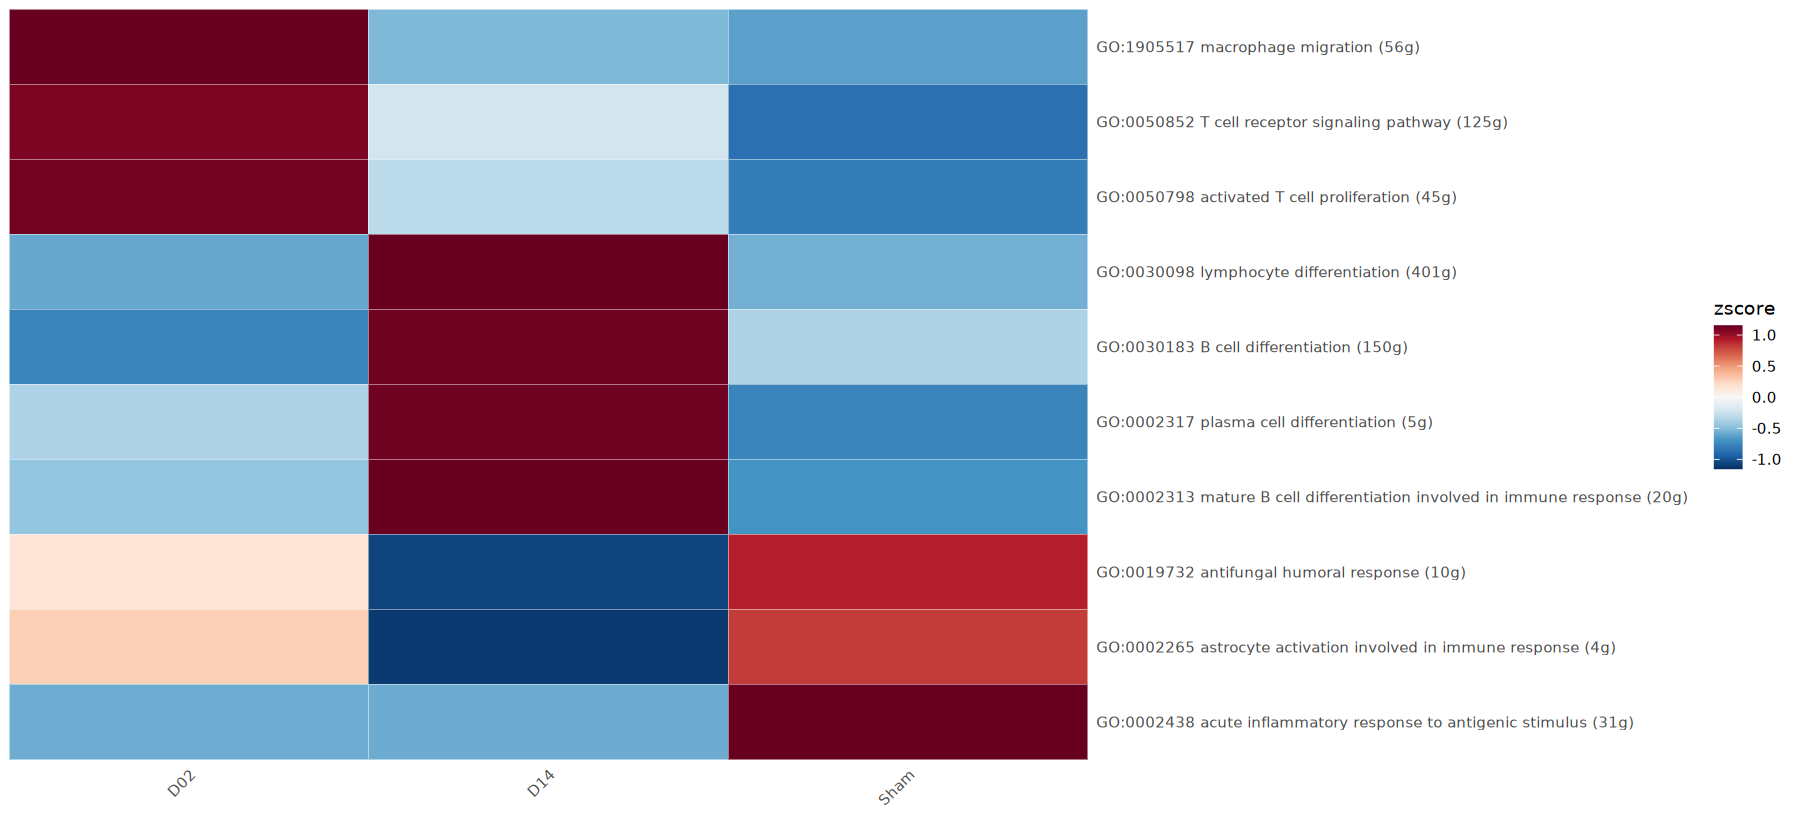

In [101]:
Heatmap(CalcStats(matr, f = pbmc$treatment, order = "p", n = 4), lab_fill = "zscore")

The 'I want hue' color presets were generated from: https://medialab.github.io/iwanthue/
This message is shown once per session



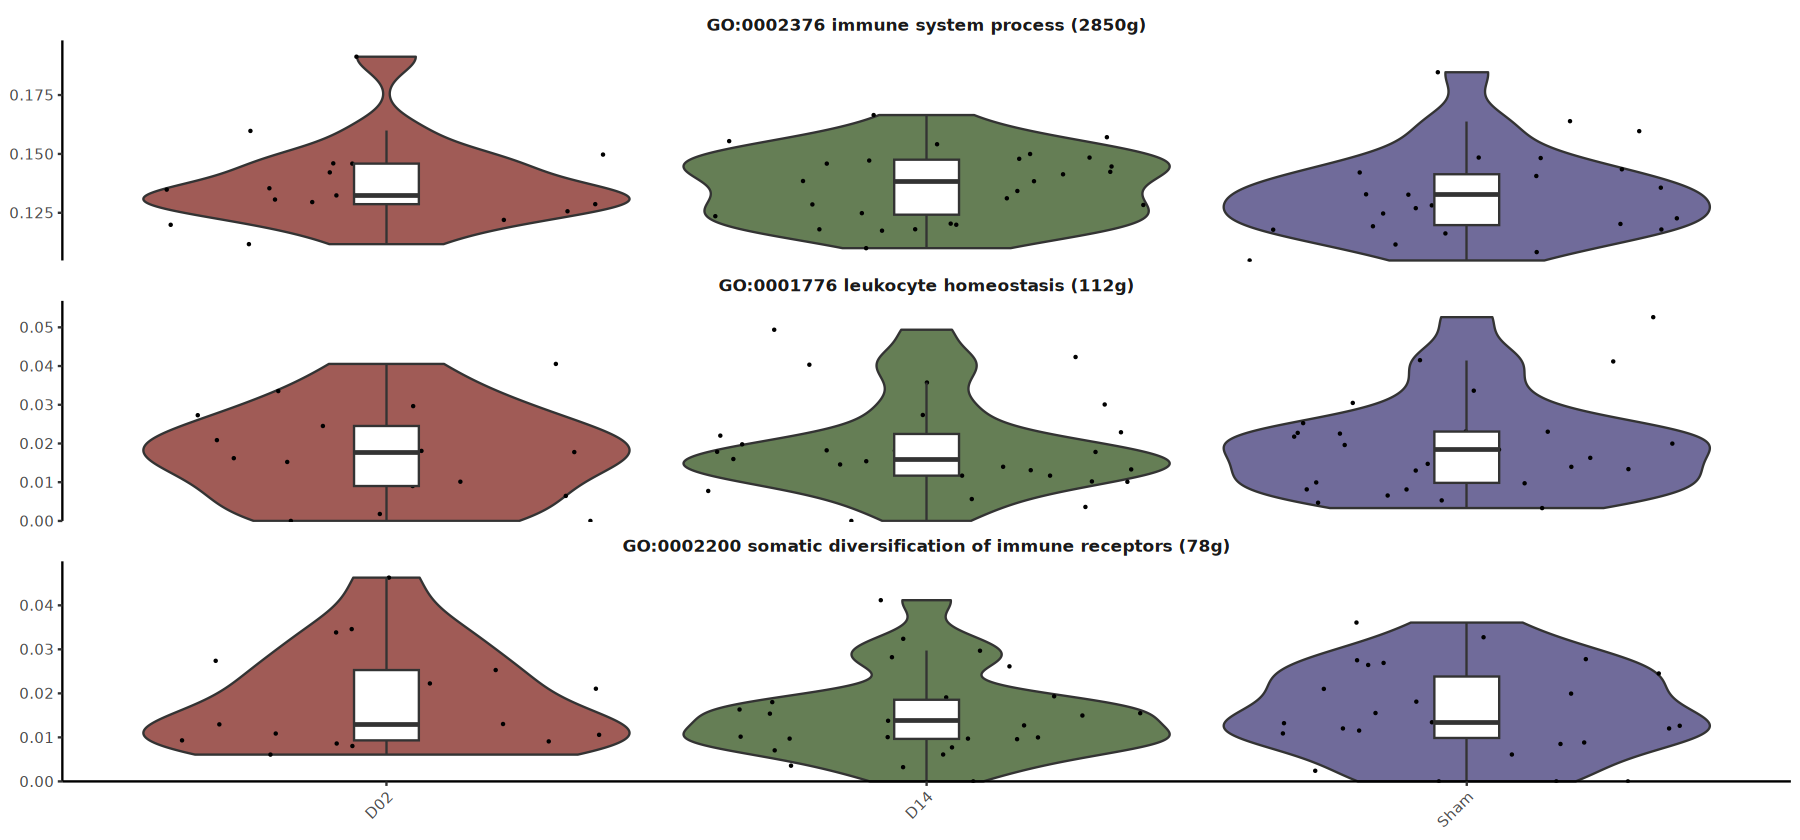

In [102]:
# Violin Plot: Best suited for comparing multiple groups with fewer features while presenting more details for individual data points.

VlnPlot2(matr[1:3,], f = pbmc$treatment, ncol = 1)


Attaching package: 'rlist'


The following object is masked from 'package:S4Vectors':

    List



Attaching package: 'tidyr'


The following object is masked from 'package:reshape2':

    smiths


The following object is masked from 'package:S4Vectors':

    expand


The following objects are masked from 'package:Matrix':

    expand, pack, unpack


The following object is masked from 'package:magrittr':

    extract




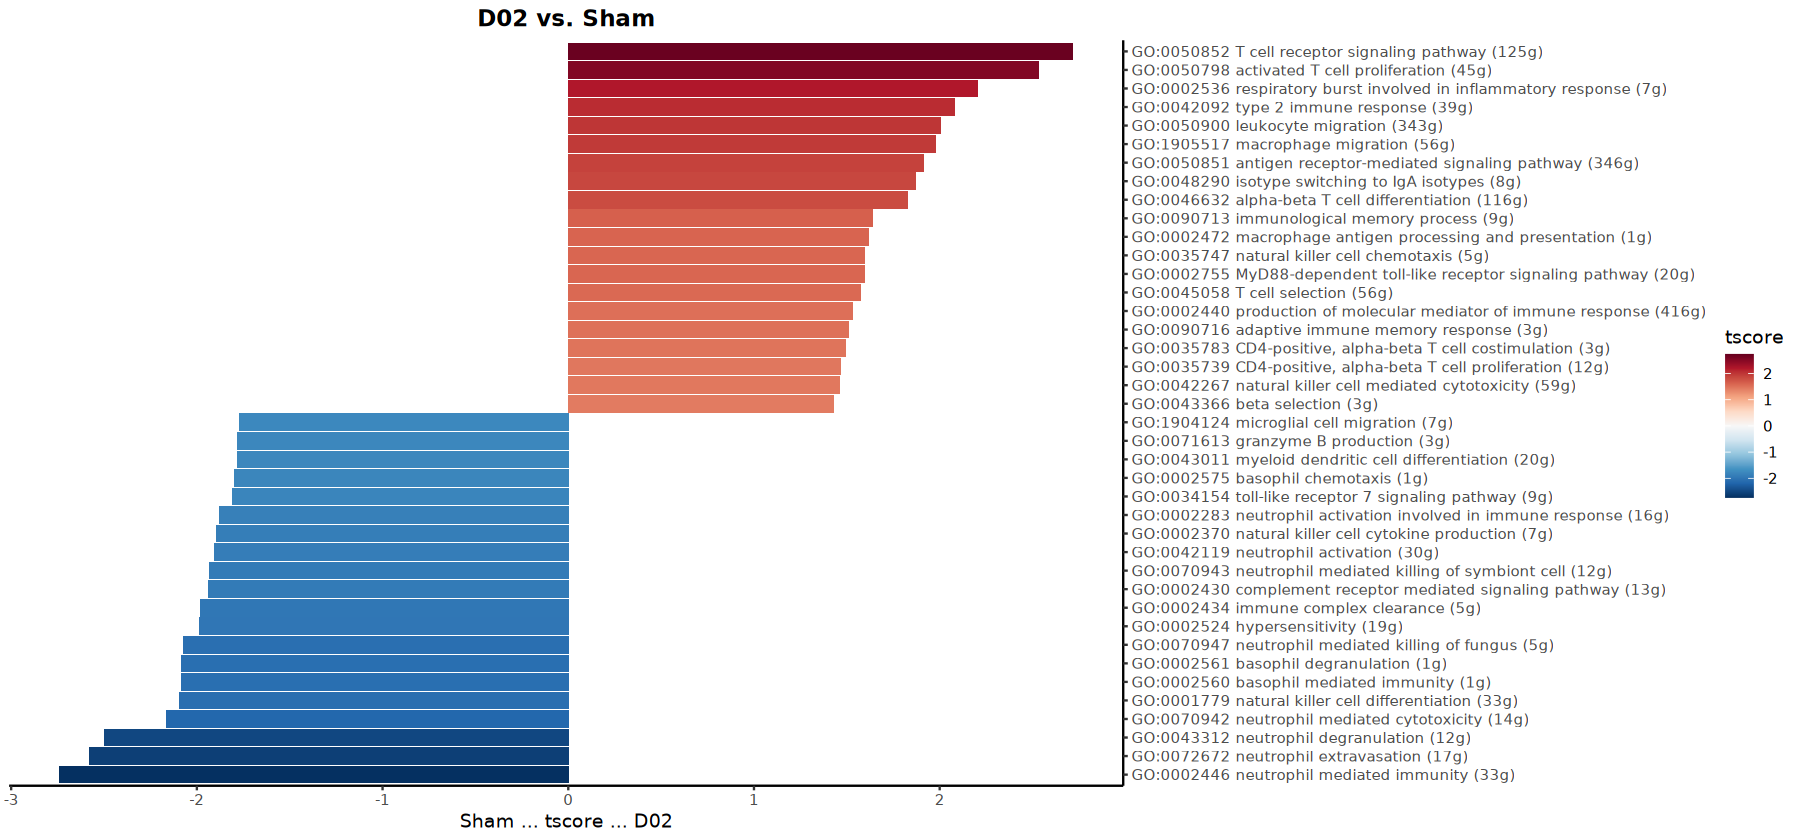

In [103]:
# Waterfall Plot: Ideal for comparing two groups.

WaterfallPlot(matr, 
              f = pbmc$treatment, 
              ident.1 = "D02", ident.2 = "Sham", top.n = 20)

In [106]:
# hallmark datasets from MsigDb, comes from SeuratExtend:

hall50 %>% names()

[1] "human" "mouse"

In [107]:
hall50$human %>% names()

[1] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"    "HALLMARK_HYPOXIA"                   
 [3] "HALLMARK_CHOLESTEROL_HOMEOSTASIS"    "HALLMARK_MITOTIC_SPINDLE"           
 [5] "HALLMARK_WNT_BETA_CATENIN_SIGNALING" "HALLMARK_TGF_BETA_SIGNALING"        
 [7] "HALLMARK_IL6_JAK_STAT3_SIGNALING"    "HALLMARK_DNA_REPAIR"                
 [9] "HALLMARK_G2M_CHECKPOINT"             "HALLMARK_APOPTOSIS"                 
[11] "HALLMARK_NOTCH_SIGNALING"            "HALLMARK_ADIPOGENESIS"              
 [ reached getOption("max.print") -- omitted 38 entries ]

In [109]:
# created a new guix profile with domc package for parallel processing:

my_seurat_extend_with_domc_package <- 
    "/home/ykazci/.guix-extra-profiles/seurat_extend_w_DOMC/seurat_extend_w_DOMC/site-library"

In [110]:
.libPaths(new = my_seurat_extend_with_domc_package, include.site = FALSE)

In [111]:
.libPaths()

[1] "/gnu/store/28bh8a6bwmiixzb5c37c4sy3s445sdzw-profile/site-library"         
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [112]:
GeneSetAnalysisGO()

Commonly used datasets:
  GO:0002376: immune_system_process
  GO:0050896: response_to_stimulus
  GO:0023052: signaling
  GO:0008152: metabolic_process
  GO:1901342: regulation_of_vasculature_development
  GO:0007165: signal_transduction



immune_system_process                  response_to_stimulus 
                         "GO:0002376"                          "GO:0050896" 
                            signaling                     metabolic_process 
                         "GO:0023052"                          "GO:0008152" 
regulation_of_vasculature_development                   signal_transduction 
                         "GO:1901342"                          "GO:0007165"

In [113]:
pbmc <- 
    GeneSetAnalysisGO(pbmc, 
                      parent = "metabolic_process", 
                      nCores = 12)

2025-03-22 18:14:09.32189 Retrieve GO database

2025-03-22 18:14:09.454903 Start filtering 2798 gene set(s): n(Genes) >= 1, n(Genes) <= Inf, at least 40% of genes found in the datasets

2025-03-22 18:14:10.663607 2529 gene set(s) passed the filter

2025-03-22 18:14:10.669152 Using pre-exiting cell ranking matrix in 'misc' slot

2025-03-22 18:14:10.701219 Calculating 2529 gene set(s)

Loading required package: doMC

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel

Using 12 cores with doMC.

Genes in the gene sets NOT available in the dataset: 
	GO:0008152: 	3140 (29% of 10735)
	GO:0006734: 	3 (10% of 30)
	GO:0006739: 	2 (5% of 37)
	GO:0006807: 	2486 (27% of 9136)
	GO:0009056: 	487 (21% of 2302)
	GO:0009058: 	1311 (25% of 5267)
	GO:0019674: 	7 (14% of 49)
	GO:0019748: 	26 (38% of 69)
	GO:0032259: 	63 (17% of 362)
	GO:0032963: 	31 (29% of 107)
	GO:0042440: 	16 (24% of 67)
	GO:0042445: 	108 (48% of 225)
	GO:0044237: 	2412 (25% of 9

In [115]:
pbmc@misc$AUCell$GO$metabolic_process %>% .[1:10, 1:5]

cells
gene sets    BRS02R1ATAGTATCTAAT BRS02R1CCTTGTACCTAC BRS02R2ACCCCCAGAGTT
  GO:0008152 0.68745165          0.66214791          0.64346212         
  GO:0006734 0.06146460          0.00000000          0.01983750         
            cells
gene sets    BRS02R2GCGACGCTAACC BRS02R2CACCGACAGATA
  GO:0008152 0.63672305          0.633511740        
  GO:0006734 0.01962646          0.033660441        
 [ reached getOption("max.print") -- omitted 8 rows ]

In [117]:
# Reactome Database:
# For GSEA using the Reactome database, consider assessing pathways under certain categories to make the process more manageable. The example below evaluates pathways under the “Immune System” category. Results from this analysis are saved under: seu@misc$AUCell$Reactome[[title]].

In [119]:
pbmc <- GeneSetAnalysisReactome(GBonilla_seurat, parent = "Immune System", nCores = 16)

2025-03-22 18:20:42.973609 Retrieve Reactome database

2025-03-22 18:20:42.978239 Start filtering 188 gene set(s): n(Genes) >= 1, n(Genes) <= Inf, at least 40% of genes found in the datasets

2025-03-22 18:20:43.060529 167 gene set(s) passed the filter

2025-03-22 18:20:43.063992 Build AUC Rank

2025-03-22 18:21:09.150492 Calculating 167 gene set(s)

Using 16 cores with doMC.

Genes in the gene sets NOT available in the dataset: 
	R-MMU-168256: 	395 (21% of 1854)
	R-MMU-1280215: 	106 (19% of 544)
	R-MMU-1280218: 	134 (17% of 777)
	R-MMU-168249: 	249 (24% of 1037)
	R-MMU-449147: 	34 (13% of 264)
	R-MMU-5668541: 	7 (7% of 100)
	R-MMU-913531: 	16 (23% of 69)
	R-MMU-9607240: 	54 (22% of 249)
	R-MMU-202403: 	9 (8% of 116)
	R-MMU-388841: 	7 (10% of 71)
	R-MMU-983169: 	36 (10% of 358)
	R-MMU-983705: 	62 (39% of 161)
	R-MMU-198933: 	90 (49% of 185)
	R-MMU-2132295: 	16 (12% of 134)
	R-MMU-8851680: 	3 (43% of 7)
	R-MMU-1222556: 	7 (19% of 36)
	R-MMU-168643: 	1 (2% of 49)
	R-MMU-168898: 	12 (9% o

In [120]:
matr <- pbmc@misc$AUCell$Reactome$`Immune System`

In [121]:
matr <- RenameReactome(matr)

Using id as id variables



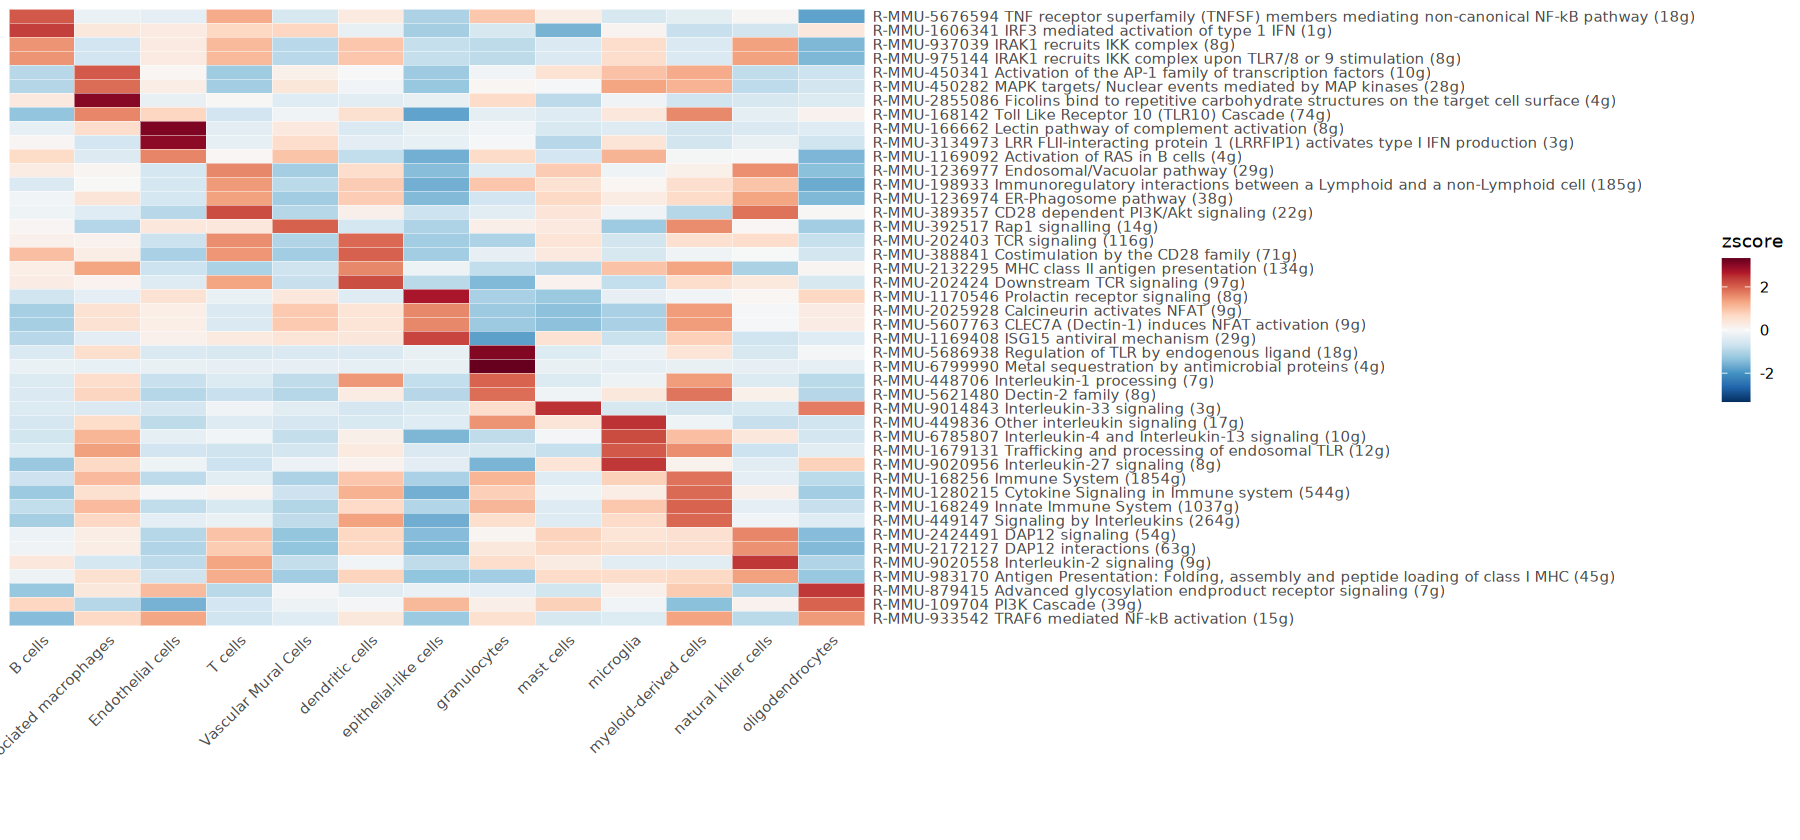

In [122]:
Heatmap(CalcStats(matr, f = pbmc$main_cell_types, order = "p", n = 4), lab_fill = "zscore")

In [123]:
# Similar to the GO database, running GeneSetAnalysisReactome() without any arguments lets you view commonly used categories in the Reactome database:

In [124]:
GeneSetAnalysisReactome()

Commonly used datasets:
  R-MMU-109582 : Hemostasis
  R-MMU-112316 : Neuronal System
  R-MMU-1266738: Developmental Biology
  R-MMU-1430728: Metabolism
  R-MMU-1474165: Reproduction
  R-MMU-1474244: Extracellular matrix organization
  R-MMU-1500931: Cell-Cell communication
  R-MMU-162582 : Signal Transduction
  R-MMU-1640170: Cell Cycle
  R-MMU-1643685: Disease
  R-MMU-168256 : Immune System
  R-MMU-1852241: Organelle biogenesis and maintenance
  R-MMU-382551 : Transport of small molecules
  R-MMU-392499 : Metabolism of proteins
  R-MMU-397014 : Muscle contraction
  R-MMU-4839726: Chromatin organization
  R-MMU-5357801: Programmed Cell Death
  R-MMU-5653656: Vesicle-mediated transport
  R-MMU-69306  : DNA Replication
  R-MMU-73894  : DNA Repair
  R-MMU-74160  : Gene expression (Transcription)
  R-MMU-8953854: Metabolism of RNA
  R-MMU-8953897: Cellular responses to external stimuli
  R-MMU-8963743: Digestion and absorption
  R-MMU-9609507: Protein localization
  R-MMU-9612973: Autophag

R-MMU-109582                           R-MMU-112316 
                          "Hemostasis"                      "Neuronal System" 
                         R-MMU-1266738                          R-MMU-1430728 
               "Developmental Biology"                           "Metabolism" 
                         R-MMU-1474165                          R-MMU-1474244 
                        "Reproduction"    "Extracellular matrix organization" 
                         R-MMU-1500931                           R-MMU-162582 
             "Cell-Cell communication"                  "Signal Transduction" 
                         R-MMU-1640170                          R-MMU-1643685 
                          "Cell Cycle"                              "Disease" 
                          R-MMU-168256                          R-MMU-1852241 
                       "Immune System" "Organelle biogenesis and maintenance" 
 [ reached getOption("max.print") -- omitted 14 entries ]

In [126]:
GBonilla_seurat$sample %>% unique()

[1] "GSM7060815_Brain" "GSM7060816_Brain" "GSM7060817_Brain" "GSM7060818_Brain"
 [5] "GSM7060819_Brain" "GSM7060820_Brain" "GSM7060821_Brain" "GSM7060822_Brain"
 [9] "GSM7060823_Brain" "GSM7060824_Brain" "GSM7060825_Brain" "GSM7060826_Brain"

In [127]:
GBonilla_seurat$Sample_description %>% unique()

[1] "2d sham; hemisphere; CD45hi + MG + EC"               
[2] "2d stroke; ipsilateral hemisphere; CD45hi + MG + EC" 
[3] "14d stroke; ipsilateral hemisphere; CD45hi + MG + EC"

In [130]:
GBonilla_seurat@meta.data %>% 
    count(treatment, main_cell_types) %>% 
    pivot_wider(names_from = treatment, main_cell_types, values_from = n)

Warning message:
"Specifying the `id_cols` argument by position was deprecated in tidyr 1.3.0.
i Please explicitly name `id_cols`, like `id_cols = main_cell_types`."


main_cell_types               D02  D14  Sham 
1  B cells                         70  141   235
2  Border-associated macrophages  357  214   587
3  Endothelial cells             2491 1610  1779
 [ reached getOption("max.print") -- omitted 10 rows ]

In [131]:
GBonilla_seurat$treatment_and_cell_types <- 
                    paste0(GBonilla_seurat$treatment, '_',
                           GBonilla_seurat$main_cell_types)

In [132]:
GBonilla_seurat$treatment_and_cell_types %>% 
                                            table()

.
                      D02_B cells D02_Border-associated macrophages 
                               70                               357 
            D02_Endothelial cells                       D02_T cells 
                             2491                               215 
         D02_Vascular Mural Cells               D02_dendritic cells 
                               35                              1282 
        D02_epithelial-like cells                  D02_granulocytes 
                                7                               350 
                   D02_mast cells                     D02_microglia 
                                8                              2693 
        D02_myeloid-derived cells          D02_natural killer cells 
                             7225                                73 
 [ reached getOption("max.print") -- omitted 27 entries ]

In [134]:
pbmc %>% dim()

[1] 14316 43269

In [135]:
pbmc$cluster <- GBonilla_seurat$treatment_and_cell_types

In [137]:
p1 <- Heatmap(CalcStats(matr, f = pbmc$cluster, order = "p", n = 4), lab_fill = "zscore")

Using id as id variables



In [140]:
my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

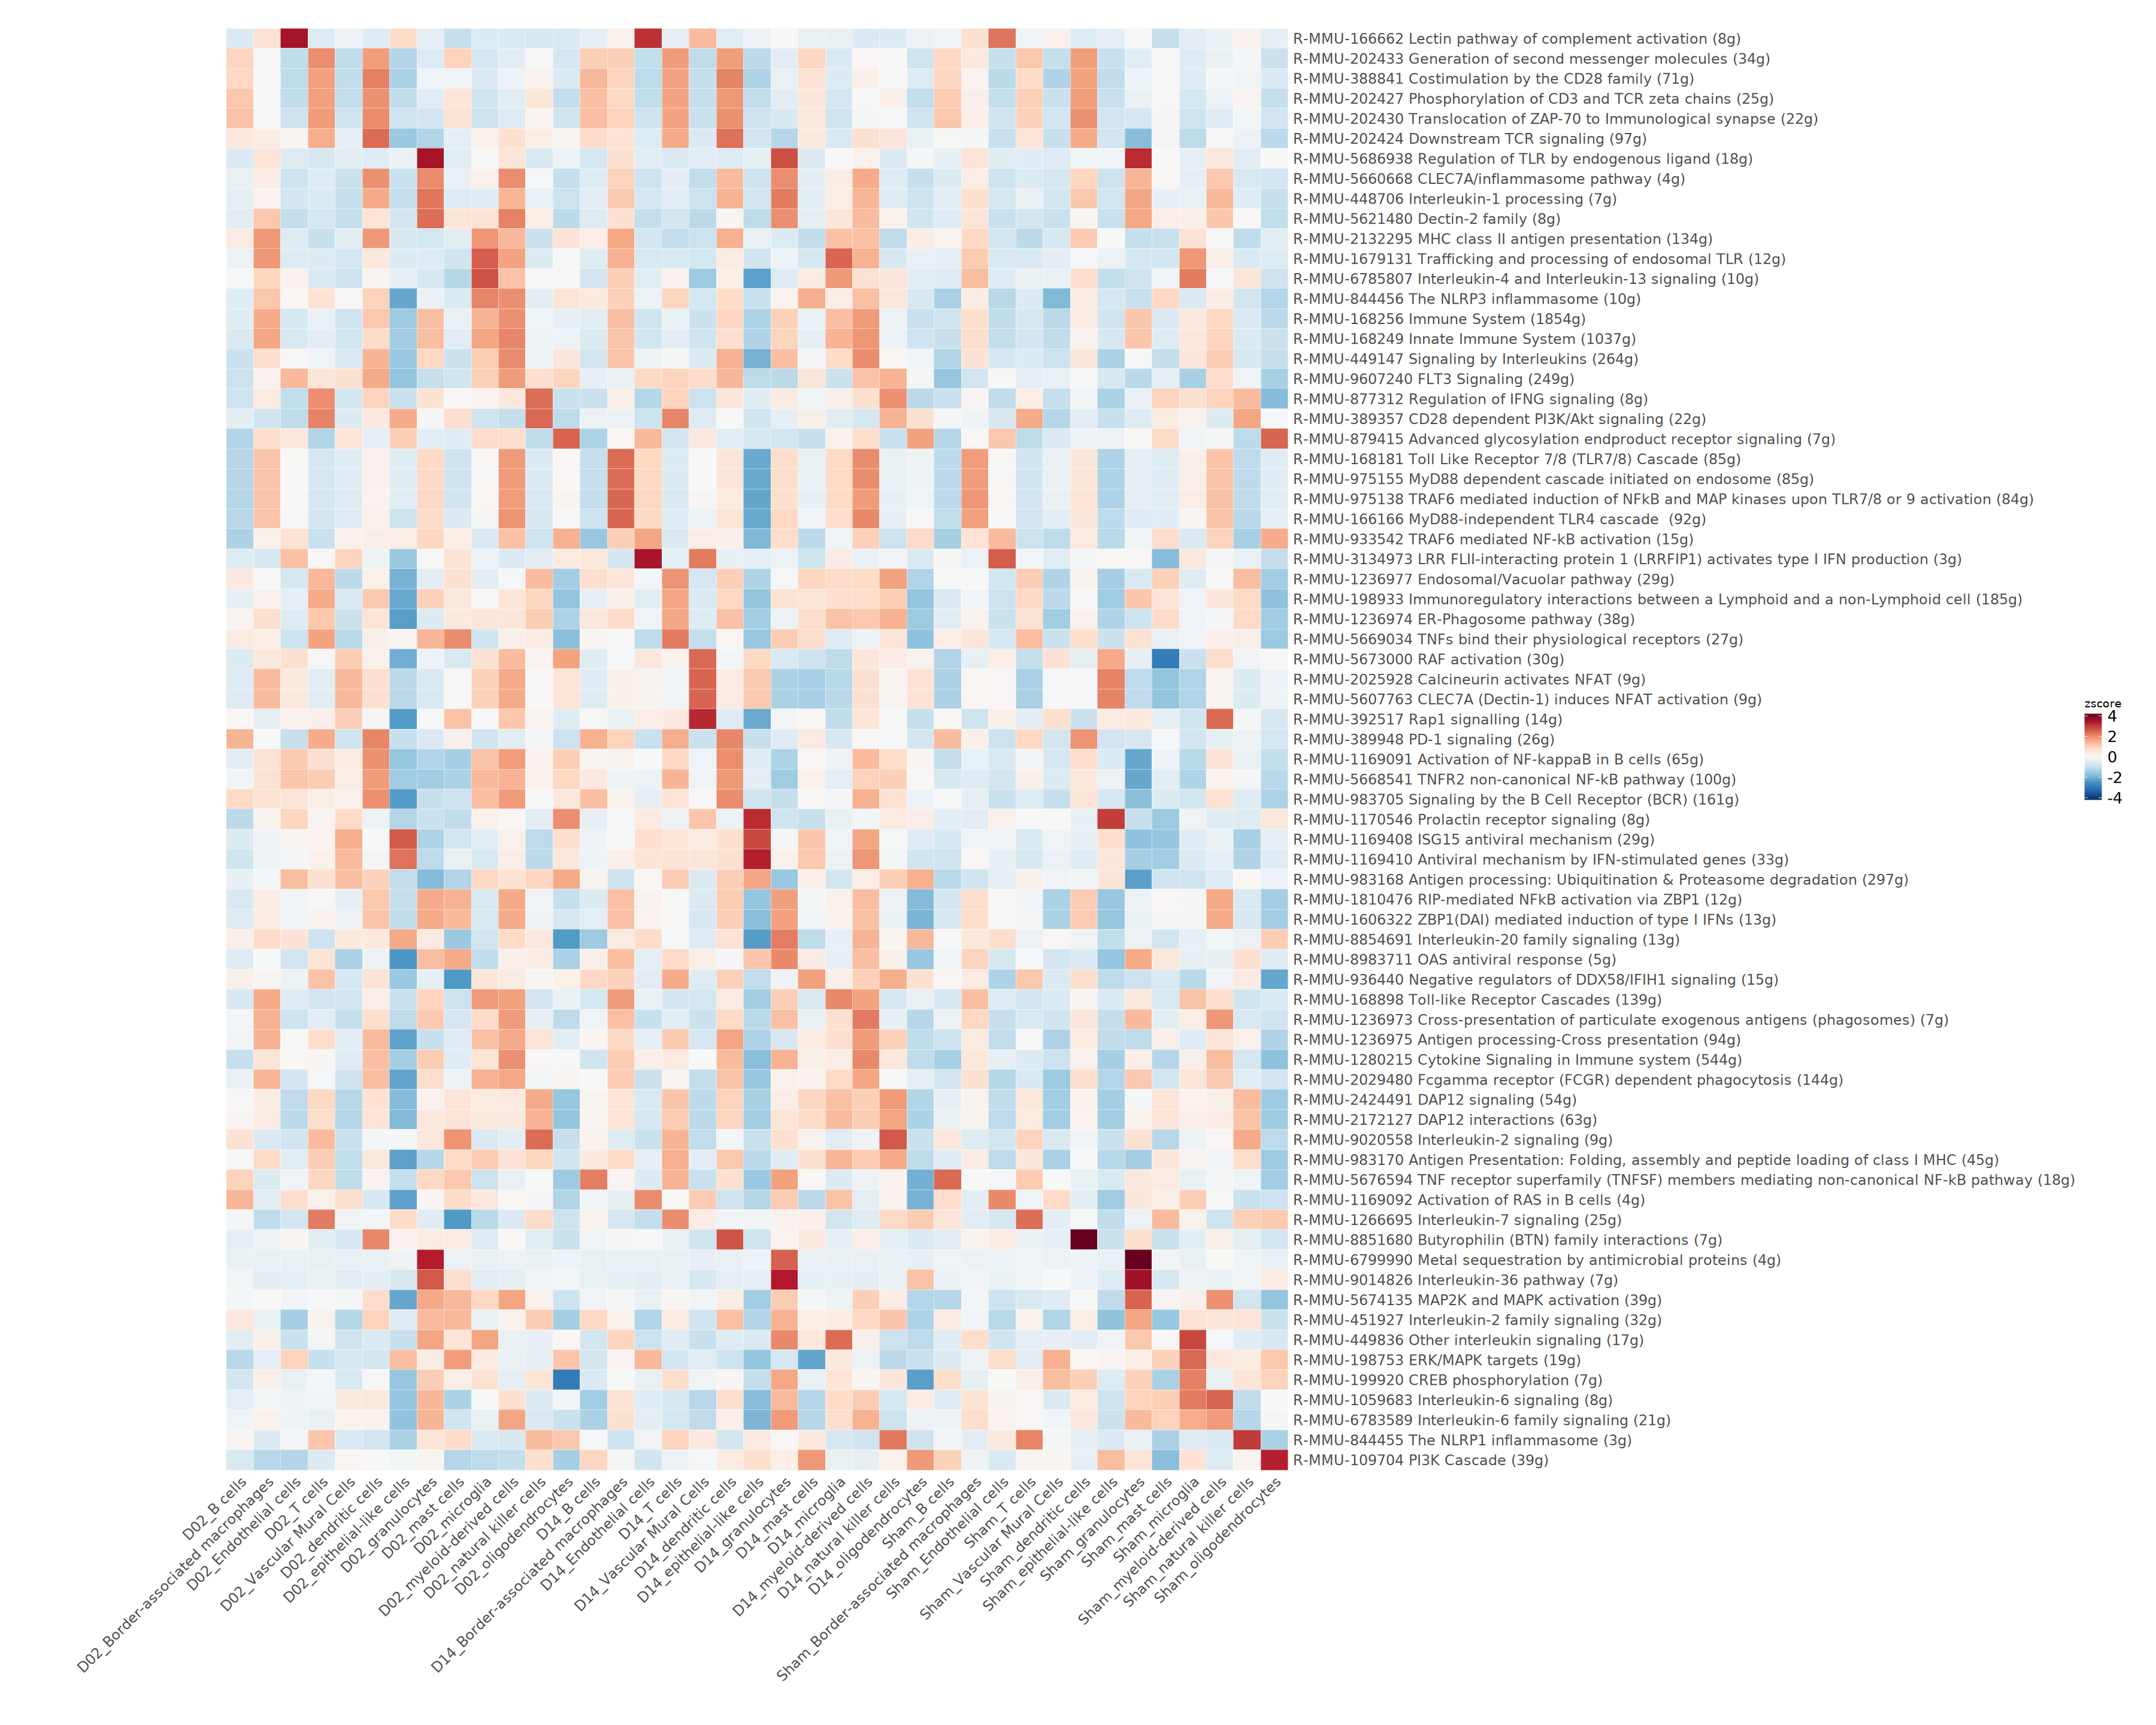

In [142]:
options(repr.plot.width = 30, repr.plot.height = 24)

p1 + theme(plot.margin = ggplot2::unit(c(1, 1, 1, 8), "cm")) + my_theme

In [143]:
options(repr.plot.width = 7, repr.plot.height = 7)

In [144]:
# Perform GSEA using customized genesets:
# To conduct a Gene Set Enrichment Analysis (GSEA) with custom gene sets, 
# the GeneSetAnalysis function is the tool of choice. For instance, 
# one might consider utilizing the Hallmark 50 gene set, 
# commonly employed for general screening. This set can be accessed 
# via the hall50 object. Upon execution, the resulting AUCell 
# matrix will be stored under the path: seu@misc$AUCell[[title]].

In [145]:
pbmc <- GeneSetAnalysis(pbmc, genesets = hall50$mouse, nCores = 16)

2025-03-22 19:41:22.010125 Start filtering 50 gene set(s): n(Genes) >= 1, n(Genes) <= Inf, at least 40% of genes found in the datasets

2025-03-22 19:41:22.03777 49 gene set(s) passed the filter

2025-03-22 19:41:22.041358 Using pre-exiting cell ranking matrix in 'misc' slot

2025-03-22 19:41:22.071009 Calculating 49 gene set(s)

Using 16 cores with doMC.

Genes in the gene sets NOT available in the dataset: 
	HALLMARK_TNFA_SIGNALING_VIA_NFKB: 	12 (6% of 201)
	HALLMARK_HYPOXIA: 	41 (20% of 208)
	HALLMARK_CHOLESTEROL_HOMEOSTASIS: 	9 (12% of 76)
	HALLMARK_MITOTIC_SPINDLE: 	2 (1% of 197)
	HALLMARK_WNT_BETA_CATENIN_SIGNALING: 	5 (12% of 42)
	HALLMARK_TGF_BETA_SIGNALING: 	3 (5% of 55)
	HALLMARK_IL6_JAK_STAT3_SIGNALING: 	10 (11% of 87)
	HALLMARK_DNA_REPAIR: 	23 (14% of 170)
	HALLMARK_G2M_CHECKPOINT: 	5 (3% of 196)
	HALLMARK_APOPTOSIS: 	13 (8% of 163)
	HALLMARK_NOTCH_SIGNALING: 	2 (6% of 32)
	HALLMARK_ADIPOGENESIS: 	18 (9% of 206)
	HALLMARK_ESTROGEN_RESPONSE_EARLY: 	38 (19% of 201)
	HALLMARK_

In [146]:
matr <- pbmc@misc$AUCell$genesets

In [147]:
p1 <- Heatmap(CalcStats(matr, f = pbmc$cluster), lab_fill = "zscore")

Using id as id variables



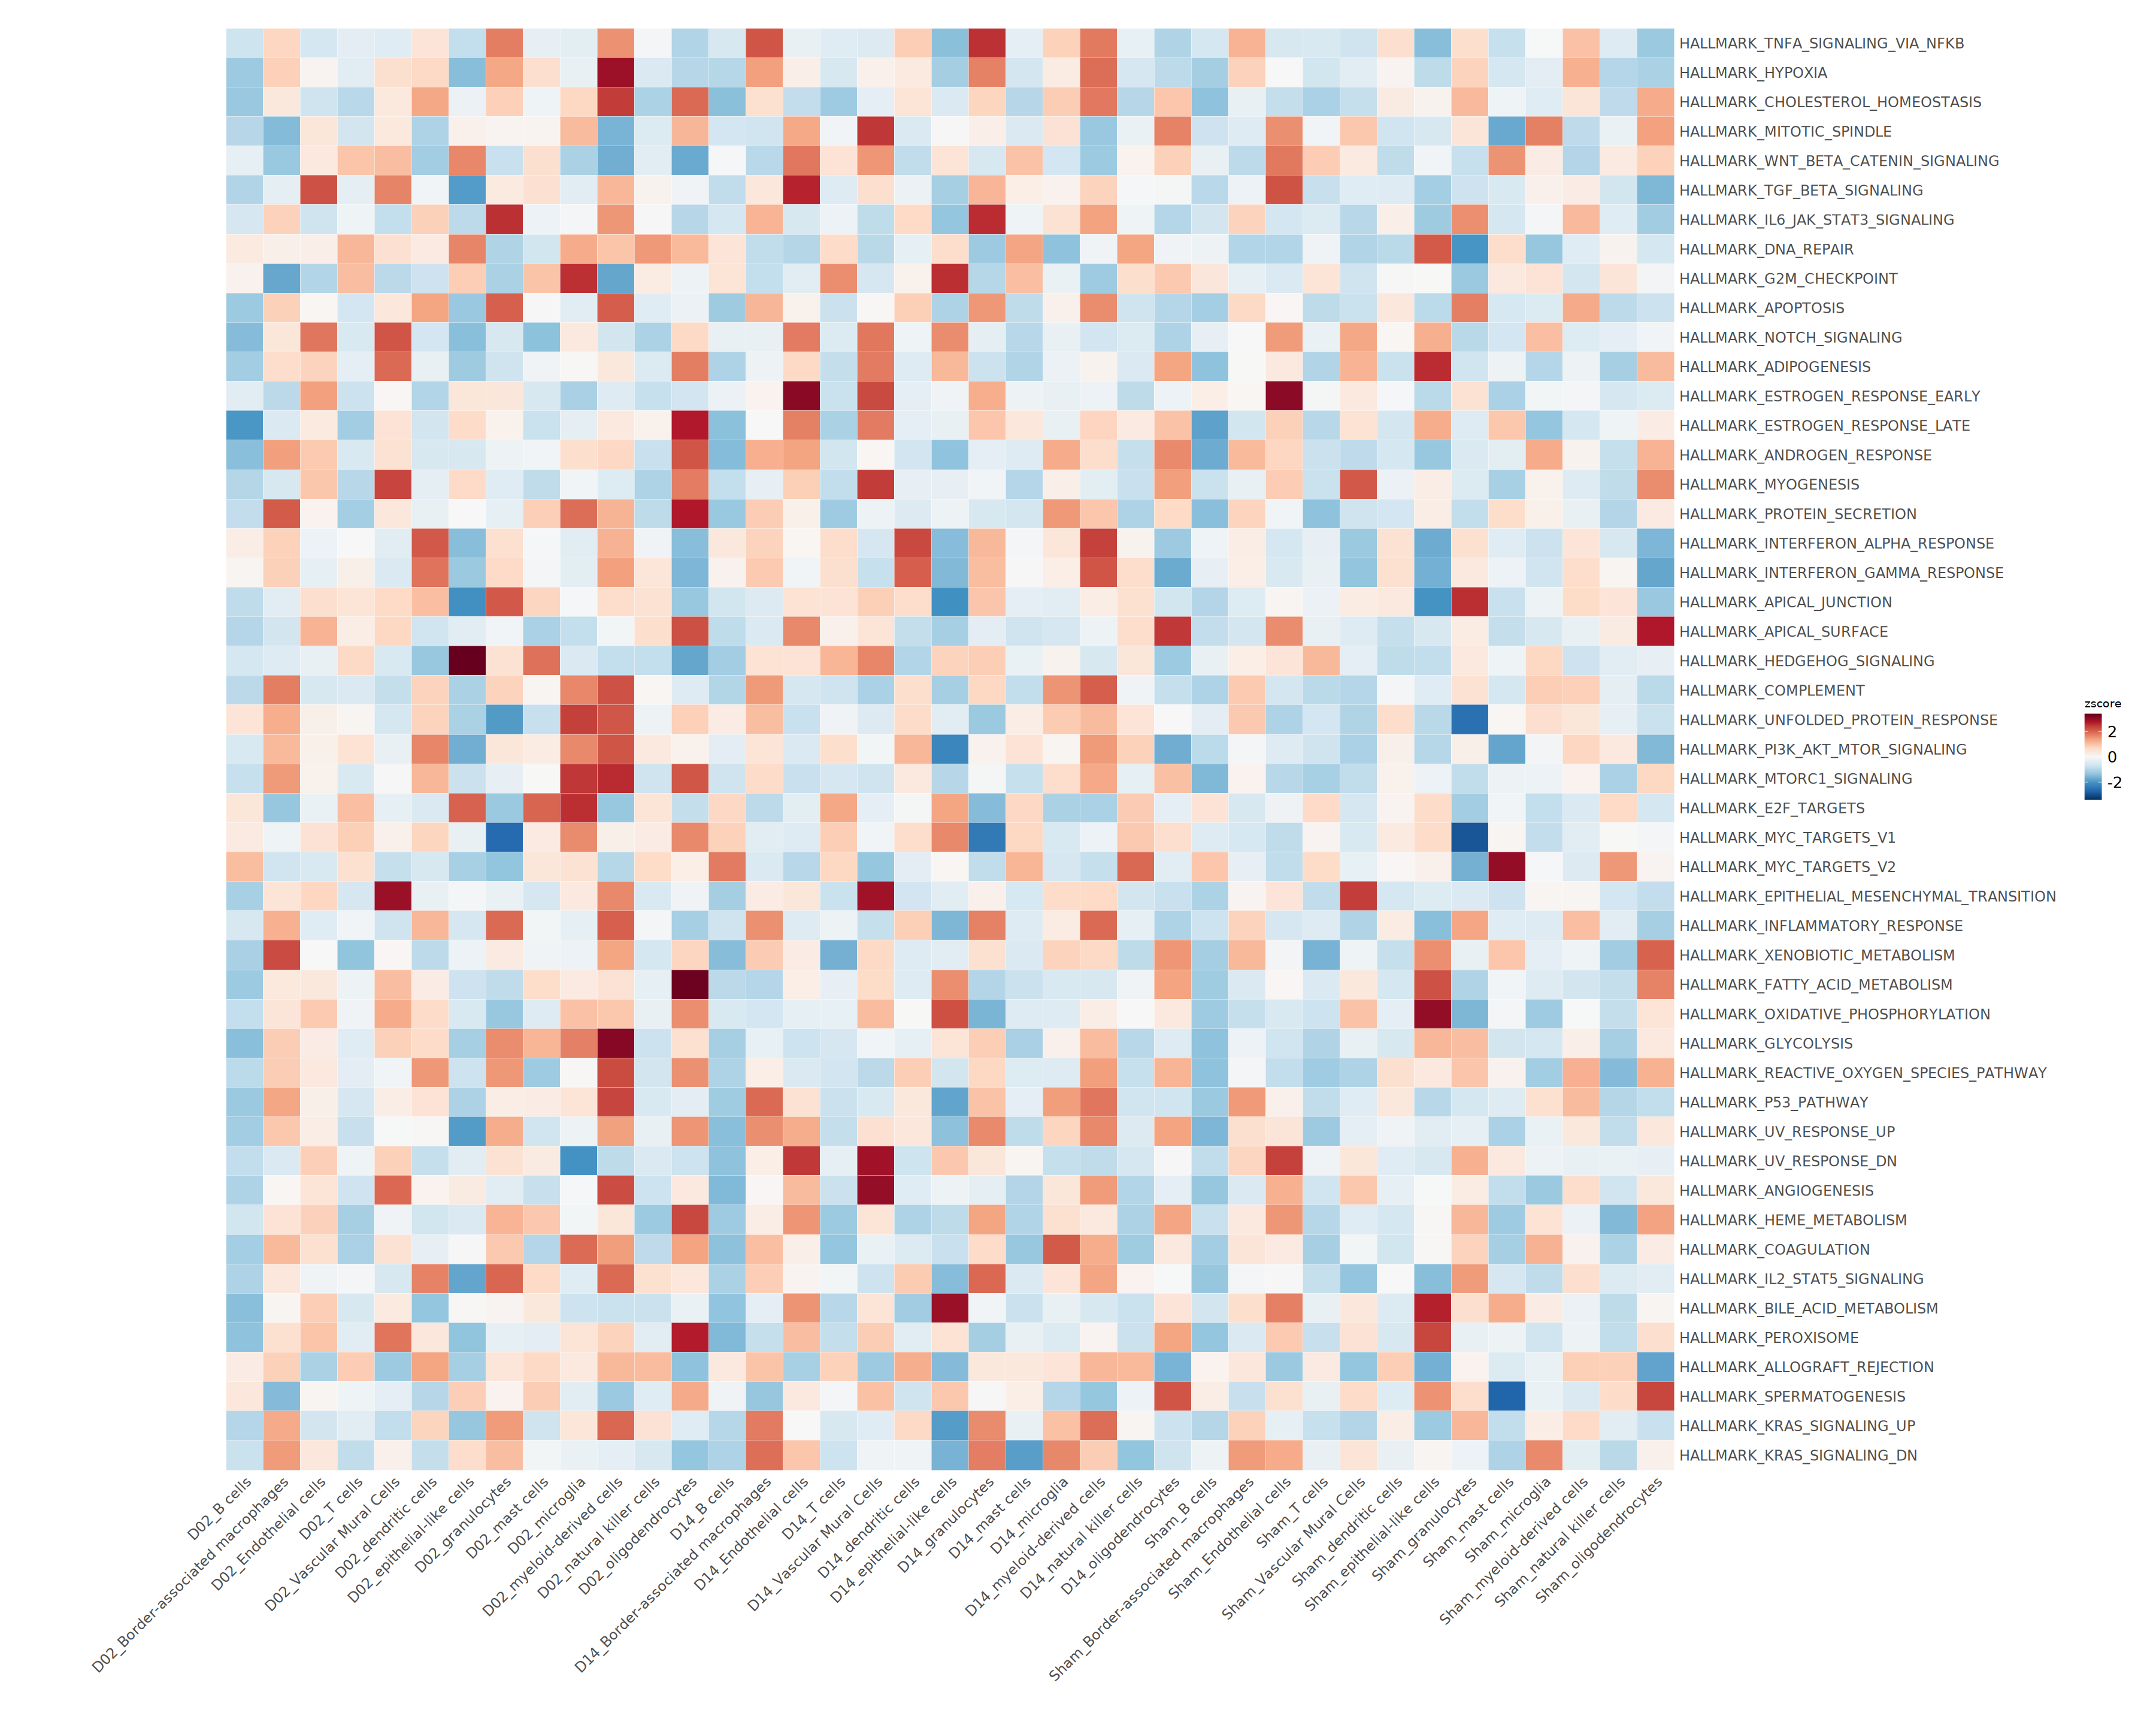

In [148]:
options(repr.plot.width = 30, repr.plot.height = 24)

p1 + theme(plot.margin = ggplot2::unit(c(1, 1, 1, 8), "cm")) + my_theme

In [150]:
# For those seeking a plethora of other gene sets, the SeuratExtendData::Genesets_data 
# offers an expansive collection sourced from the GSEA MSigDB website. 
# Here’s how you can view the available collections:

names(SeuratExtendData::Genesets_data$mouse$GSEA)

[1] "positional gene sets"                
 [2] "all curated gene sets"               
 [3] "chemical and genetic perturbations"  
 [4] "BioCarta gene sets"                  
 [5] "KEGG gene sets"                      
 [6] "PID gene sets"                       
 [7] "all canonical pathways"              
 [8] "all motif gene sets"                 
 [9] "transcription factor targets"        
[10] "all computational gene sets"         
[11] "all immunologic signatures gene sets"
[12] "hallmark gene sets"

In [151]:
# Furthermore, for cluster annotations, the SeuratExtend::PanglaoDB_data 
# contains a valuable resource: marker lists for 178 distinct cell types, 
# curated from PanglaoDB. To explore these marker lists:

names(SeuratExtend::PanglaoDB_data$marker_list_human)

[1] "Acinar cells"                   "Adipocyte progenitor cells"    
 [3] "Adipocytes"                     "Adrenergic neurons"            
 [5] "Airway epithelial cells"        "Airway goblet cells"           
 [7] "Airway smooth muscle cells"     "Alpha cells"                   
 [9] "Alveolar macrophages"           "Anterior pituitary gland cells"
[11] "Astrocytes"                     "B cells"                       
 [ reached getOption("max.print") -- omitted 166 entries ]

In [160]:
# General Search:

# The ‘item’ parameter is highly versatile, allowing you to 
# search by gene name, pathway ID, or even keywords within 
# pathway names. The following example demonstrates how to 
# find pathways containing the gene “CD3D” or pathways 
# with names including “metabolic.”

result <- SearchDatabase(c("Foxp1", "hypoxia"))
names(result) %>% head(10)

Search in GO database

Search in Reactome database



[1] "GO:0000122 negative regulation of transcription by RNA polymerase II (870g)"            
 [2] "GO:0000302 response to reactive oxygen species (203g)"                                  
 [3] "GO:0000902 cell morphogenesis (1116g)"                                                  
 [4] "GO:0000904 cell morphogenesis involved in differentiation (821g)"                       
 [5] "GO:0000976 transcription regulatory region sequence-specific DNA binding (893g)"        
 [6] "GO:0000977 RNA polymerase II regulatory region sequence-specific DNA binding (852g)"    
 [7] "GO:0000978 RNA polymerase II cis-regulatory region sequence-specific DNA binding (640g)"
 [8] "GO:0000981 DNA-binding transcription factor activity, RNA polymerase II-specific (774g)"
 [9] "GO:0000987 cis-regulatory region sequence-specific DNA binding (665g)"                  
[10] "GO:0001012 RNA polymerase II regulatory region DNA binding (860g)"

In [161]:
glimpse(head(result, 3))

List of 3
 $ GO:0000122 negative regulation of transcription by RNA polymerase II (870g):List of 3
  ..$ SetID  : chr "GO:0000122"
  ..$ SetName: chr "negative regulation of transcription by RNA polymerase II"
  ..$ Genes  : chr [1:870] "Hmga2" "Mtf1" "Isl1" "Ppard" ...
 $ GO:0000302 response to reactive oxygen species (203g)                      :List of 3
  ..$ SetID  : chr "GO:0000302"
  ..$ SetName: chr "response to reactive oxygen species"
  ..$ Genes  : chr [1:203] "Cfl1" "Lig1" "Traf2" "Rack1" ...
 $ GO:0000902 cell morphogenesis (1116g)                                      :List of 3
  ..$ SetID  : chr "GO:0000902"
  ..$ SetName: chr "cell morphogenesis"
  ..$ Genes  : chr [1:1116] "Cfl1" "Syt4" "Cdk5r1" "Cdk5" ...


In [162]:
# Type-Specific Search:

# If you wish to limit your search to specific types of items 
# such as gene names, you can utilize the ‘type’ parameter as shown below.

result <- SearchDatabase("Foxp1", type = "gene")
names(result) %>% head()

Search in GO database

Search in Reactome database



[1] "GO:0000122 negative regulation of transcription by RNA polymerase II (870g)"        
[2] "GO:0000302 response to reactive oxygen species (203g)"                              
[3] "GO:0000902 cell morphogenesis (1116g)"                                              
[4] "GO:0000904 cell morphogenesis involved in differentiation (821g)"                   
[5] "GO:0000976 transcription regulatory region sequence-specific DNA binding (893g)"    
[6] "GO:0000977 RNA polymerase II regulatory region sequence-specific DNA binding (852g)"

In [163]:
# Database-Specific Search:
# To focus your search within a particular database, 
# specify the database name using the ‘database’ parameter.

result <- SearchDatabase("Lef1", database = "Reactome")
names(result) %>% head()

Search in Reactome database



[1] "R-MMU-162582 Signal Transduction (2498g)"                                    
[2] "R-MMU-195253 Degradation of beta-catenin by the destruction complex (79g)"   
[3] "R-MMU-195721 Signaling by WNT (302g)"                                        
[4] "R-MMU-201681 TCF dependent signaling in response to WNT (221g)"              
[5] "R-MMU-201722 Formation of the beta-catenin:TCF transactivating complex (91g)"
[6] "R-MMU-212436 Generic Transcription Pathway (839g)"

In [164]:
result$`R-MMU-3769402 Deactivation of the beta-catenin transactivating complex (32g)`

$SetID
[1] "R-MMU-3769402"

$SetName
[1] "Deactivation of the beta-catenin transactivating complex"

$Genes
 [1] "Sox9"   "Tcf7"   "Akt1"   "Akt2"   "Apc"    "Ctnnb1" "Tle1"   "Ubc"   
 [9] "Ubb"    "Xpo1"   "Rps27a" "Ywhaz" 
 [ reached getOption("max.print") -- omitted 20 entries ]

In [166]:
getOption("spe")

[1] "mouse"

In [167]:
# Species-Specific Search:
# You can specify either ‘human’ or ‘mouse’ using the ‘spe’ parameter.

# However, when not explicitly stated, 
# "spe" is set as getOption("spe") so it will set it to the 'spe' parameter
# provided inside options(). 

message(getOption("spe"))

result <- SearchDatabase("Cd3d", spe = "mouse")
glimpse(head(result, 3))

mouse

Search in GO database

Search in Reactome database



List of 3
 $ GO:0001775 cell activation (1169g)        :List of 3
  ..$ SetID  : chr "GO:0001775"
  ..$ SetName: chr "cell activation"
  ..$ Genes  : chr [1:1169] "Cd86" "Cd79a" "Cd80" "Serpine2" ...
 $ GO:0002250 adaptive immune response (640g):List of 3
  ..$ SetID  : chr "GO:0002250"
  ..$ SetName: chr "adaptive immune response"
  ..$ Genes  : chr [1:640] "Cd86" "Cd79a" "Msh2" "Traf2" ...
 $ GO:0002376 immune system process (2850g)  :List of 3
  ..$ SetID  : chr "GO:0002376"
  ..$ SetName: chr "immune system process"
  ..$ Genes  : chr [1:2850] "Gm42543" "Cd86" "Cd79a" "Cd80" ...


In [169]:
# Customizing Return Types:
# The function also offers flexibility in output types. 
# For example, if you require a list of pathway IDs for 
# downstream analysis, you can use the ‘return’ parameter as follows.

result <- SearchDatabase("Foxf2", return = "ID")
result %>% head()

Search in GO database

Search in Reactome database



[1] "GO:0000003" "GO:0000209" "GO:0000976" "GO:0000977" "GO:0000981"
[6] "GO:0001012"

In [170]:
# Alternatively, if you need the output as a gene list 
# formatted for GeneSetAnalysis, adjust the ‘return’ parameter like so:

result <- SearchDatabase("Foxf2", return = "genelist")
glimpse(head(result, 5))

Search in GO database

Search in Reactome database



List of 5
 $ GO:0000003: chr [1:1486] "Hmga2" "Lhx4" "Serpine2" "Plk4" ...
 $ GO:0000209: chr [1:205] "Traf2" "Traf1" "Cdc34" "Cdc27" ...
 $ GO:0000976: chr [1:893] "Elk3" "Lhx4" "Mybl2" "Mtf1" ...
 $ GO:0000977: chr [1:852] "Elk3" "Lhx4" "Mybl2" "Mtf1" ...
 $ GO:0000981: chr [1:774] "Gm4881" "Hmga2" "Elk3" "Lhx4" ...


In [171]:
# To export the result as a data frame, suitable for formats 
# like Excel or CSV, set the ‘export.to.data.frame’ parameter to TRUE.

result <- SearchDatabase("Foxf2", export.to.data.frame = TRUE)
glimpse(result)

Search in GO database

Search in Reactome database



Rows: 200
Columns: 3
$ SetID   <chr> "GO:0000003", "GO:0000209", "GO:0000976", "GO:0000977", "GO:00~
$ SetName <chr> "reproduction", "protein polyubiquitination", "transcription r~
$ Genes   <chr> "Hmga2,Lhx4,Serpine2,Plk4,Msh2,Tubg1,Ppard,Gpr3,Tnc,Mlh1,Arhgd~


In [172]:
GBonilla_seurat@meta.data %>% glimpse()

Rows: 43,269
Columns: 25
$ orig.ident                    <fct> Garcia-Bonilla_et_al_2023, Garcia-Bonill~
$ nCount_RNA                    <dbl> 2840, 3759, 3246, 3766, 2691, 2268, 2827~
$ nFeature_RNA                  <int> 906, 1069, 1656, 1383, 1401, 892, 1511, ~
$ before_filtering_nCount_RNA   <dbl> 3065, 3844, 3655, 3972, 2951, 2430, 3049~
$ before_filtering_nFeature_RNA <int> 962, 1135, 1820, 1492, 1520, 961, 1619, ~
$ study.ident                   <chr> "GR180716", "GR180716", "GR180716", "GR1~
$ authors_nCount_RNA            <dbl> 2988.584, 3825.015, 3426.052, 3953.069, ~
$ authors_nFeature_RNA          <int> 973, 1138, 1915, 1494, 1526, 969, 1621, ~
$ authors_percent.mt            <dbl> 5.34704237, 0.34063831, 0.30252041, 1.17~
$ tissue                        <chr> "brain", "brain", "brain", "brain", "bra~
$ organism                      <chr> "mus musculus", "mus musculus", "mus mus~
$ strain                        <chr> "C57BL/6J", "C57BL/6J", "C57BL/6J", "C57~
$ sex          

In [173]:
# Filtering a Customized Gene Set:

# Lastly, you can also filter a given gene set list 
# with the SearchPathways function. For instance, 
# within the “Hallmark 50” database, you can find 
# pathways that include the gene “Mecom” or have names 
# that contain “hypoxia.”

In [174]:
options(max.print = 12, spe = "mouse")

In [200]:
SearchPathways(genesets = hall50$mouse, item = c("Lox", "signal|hypoxia"))

$HALLMARK_TNFA_SIGNALING_VIA_NFKB
 [1] "Ddx58"  "Klf6"   "Tnip2"  "Cxcl5"  "Sat1"   "Nfkbia" "Rel"    "Zbtb10"
 [9] "Irs2"   "Nr4a3"  "Btg1b"  "Btg1c" 
 [ reached getOption("max.print") -- omitted 189 entries ]

$HALLMARK_HYPOXIA
 [1] "Tpd52"    "Klf6"     "Stbd1"    "Ext1"     "Pygm"     "Selenbp2"
 [7] "Slc2a1"   "Klhl24"   "Stc1"     "Slc37a4"  "Zfp292"   "Pdgfb"   
 [ reached getOption("max.print") -- omitted 196 entries ]

$HALLMARK_WNT_BETA_CATENIN_SIGNALING
 [1] "Frat1" "Peg12" "Hdac2" "Myc"   "Gnai1" "Numb"  "Hey1"  "Dll1"  "Maml1"
[10] "Fzd1"  "Dkk4"  "Cul1" 
 [ reached getOption("max.print") -- omitted 30 entries ]

$HALLMARK_TGF_BETA_SIGNALING
 [1] "Ltbp2"  "Smad1"  "Xiap"   "Fnta"   "Tgfbr1" "Hdac1"  "Trim33" "Bcar3" 
 [9] "Furin"  "Smurf1" "Map3k7" "Eng"   
 [ reached getOption("max.print") -- omitted 43 entries ]

$HALLMARK_IL6_JAK_STAT3_SIGNALING
 [1] "Cbl"     "Il1r1"   "Il1r2"   "Reg2"    "Reg1"    "Cd36"    "Il18r1" 
 [8] "Csf2rb2" "Ptpn11"  "Il13ra1" "Il7"     "Tyk2"   
 [ reached getOption("max.print") -- omitted 75 entries ]

$HALLMARK_NOTCH_SIGNALING
 [1] "Heyl"   "Dtx1"   "Rbx1"   "Ccnd1"  "Notch2" "Aph1a"  "Dll1"   "Sap30" 
 [9] "Fzd1"   "Maml2"  "Fzd5"   "Cul1"  
 [ reached getOption("max.print") -- omitted 20 entries ]

$HALLMARK_HEDGEHOG_SIGNALING
 [1] "Nrp1"   "Cdk6"   "Tle3"   "Unc5c"  "Hey1"   "Nkx6-1" "Myh9"   "Dpysl2"
 [9] "Thy1"   "Rtn1"   "Ophn1"  "Cntfr" 
 [ reached getOption("max.print") -- omitted 24 entries ]

$HALLMARK_PI3K_AKT_MTOR_SIGNALING
 [1] "Eif4e"  "Slc2a1" "Nck1"   "Pdk1"   "Grk2"   "Arpc3"  "Arf1"   "Ptpn11"
 [9] "Gngt1"  "Sfn"    "Sqstm1" "Cdkn1b"
 [ reached getOption("max.print") -- omitted 93 entries ]

$HALLMARK_MTORC1_SIGNALING
 [1] "M6pr"    "Slc2a1"  "Stc1"    "Slc37a4" "Cct6a"   "Add3"    "Ung"    
 [8] "Psph"    "Pdk1"    "Slc7a11" "Ufm1"    "Ppa1"   
 [ reached getOption("max.print") -- omitted 193 entries ]

$HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
 [1] "Col1a2"  "Comp"    "Cxcl5"   "Sat1"    "Msx1"    "Lama3"   "Fn1"    
 [8] "Pcolce2" "Anpep"   "Cdh2"    "Fgf2"    "Cald1"  
 [ reached getOption("max.print") -- omitted 191 entries ]

$HALLMARK_IL2_STAT5_SIGNALING
 [1] "P2rx4"     "Scn9a"     "Odc1"      "Klf6"      "Pth1r"     "Nrp1"     
 [7] "Il1r2"     "Serpinb6d" "Coch"      "Lrrc8c"    "Nt5e"      "Icos"     
 [ reached getOption("max.print") -- omitted 196 entries ]

$HALLMARK_KRAS_SIGNALING_UP
 [1] "Ephb2"  "Cbl"    "Nrp1"   "Ctss"   "Flt4"   "Mycs"   "Il1rl2" "Ano1"  
 [9] "Mycn"   "Ppbp"   "Sema3b" "Prdm1" 
 [ reached getOption("max.print") -- omitted 200 entries ]

$HALLMARK_KRAS_SIGNALING_DN
 [1] "Kcnn1"   "Cd40lg"  "Slc5a5"  "Celsr2"  "Sox10"   "Gtf3c5"  "Nudt11" 
 [8] "Nudt10"  "Gp2"     "Vpreb1"  "Slc29a3" "Tex15"  
 [ reached getOption("max.print") -- omitted 189 entries ]

In [201]:
# Regular expressions can also be used like "OR" operator: | 

SearchPathways(genesets = hall50$mouse, item = c("signal|hypoxia")) %>% head(3)

$HALLMARK_TNFA_SIGNALING_VIA_NFKB
 [1] "Ddx58"  "Klf6"   "Tnip2"  "Cxcl5"  "Sat1"   "Nfkbia" "Rel"    "Zbtb10"
 [9] "Irs2"   "Nr4a3"  "Btg1b"  "Btg1c" 
 [ reached getOption("max.print") -- omitted 189 entries ]

$HALLMARK_HYPOXIA
 [1] "Tpd52"    "Klf6"     "Stbd1"    "Ext1"     "Pygm"     "Selenbp2"
 [7] "Slc2a1"   "Klhl24"   "Stc1"     "Slc37a4"  "Zfp292"   "Pdgfb"   
 [ reached getOption("max.print") -- omitted 196 entries ]

$HALLMARK_WNT_BETA_CATENIN_SIGNALING
 [1] "Frat1" "Peg12" "Hdac2" "Myc"   "Gnai1" "Numb"  "Hey1"  "Dll1"  "Maml1"
[10] "Fzd1"  "Dkk4"  "Cul1" 
 [ reached getOption("max.print") -- omitted 30 entries ]

In [204]:
RenameGO(c("GO:0002376","GO:0050896"), spe = "mouse")

[1] "GO:0002376 immune system process (2850g)"
[2] "GO:0050896 response to stimulus (9860g)"

In [206]:
RenameReactome(c("R-MMU-109582","R-MMU-112316"), spe = "mouse")

[1] "R-MMU-109582 Hemostasis (599g)"      "R-MMU-112316 Neuronal System (340g)"

In [211]:
# Filter the GO/Reactome pathway list based on certain criteria
# Both GO and Reactome databases contain thousands of pathways, 
# but not all of which may be relevant to your study. 
# To streamline the analysis, you can use the FilterGOTerms 
# and FilterReactomeTerms functions to subset and refine the 
# list of GO or Reactome pathways based on specific criteria.

# Filtering GO Pathways:

# Let’s start by looking at how you can filter GO pathways:

# By Parent Term: To select pathways under a specific category, 
# use the parent parameter. For example, to get pathways 
# related to the immune system process:

terms <- FilterGOTerms(parent = "GO:0002376")

terms %>% head()

RenameGO(terms) %>% head()

[1] "GO:0001773" "GO:0001774" "GO:0001776" "GO:0001777" "GO:0001779"
[6] "GO:0001780"

[1] "GO:0001773 myeloid dendritic cell activation (34g)"  
[2] "GO:0001774 microglial cell activation (47g)"         
[3] "GO:0001776 leukocyte homeostasis (112g)"             
[4] "GO:0001777 T cell homeostatic proliferation (5g)"    
[5] "GO:0001779 natural killer cell differentiation (33g)"
[6] "GO:0001780 neutrophil homeostasis (24g)"

In [214]:
# By Gene Count: If you’re interested in pathways of a specific size 
# (i.e., containing a certain number of genes), you can further refine 
# your previously filtered list using the n.min and n.max parameters. 
# Building upon the pathways we selected under the “immune system process” 
# (terms), to keep only those pathways that contain between 10 and 1000 genes:

terms2 <- FilterGOTerms(term = terms, n.min = 10, n.max = 1000)

terms2 %>% head()

RenameGO(terms2) %>% head()

[1] "GO:0001773" "GO:0001774" "GO:0001776" "GO:0001779" "GO:0001780"
[6] "GO:0001782"

[1] "GO:0001773 myeloid dendritic cell activation (34g)"  
[2] "GO:0001774 microglial cell activation (47g)"         
[3] "GO:0001776 leukocyte homeostasis (112g)"             
[4] "GO:0001779 natural killer cell differentiation (33g)"
[5] "GO:0001780 neutrophil homeostasis (24g)"             
[6] "GO:0001782 B cell homeostasis (37g)"

In [219]:
# End-Level Pathways: If you prefer to look at only the end-level 
# (most specific) pathways, set the only.end.terms parameter to TRUE.

# YEK: This means not the terms parental to any other term but the end-level ones:

terms3 <- FilterGOTerms(term = terms, only.end.terms = TRUE)

In [220]:
RenameGO(terms3) %>% head()

[1] "GO:0001777 T cell homeostatic proliferation (5g)"        
[2] "GO:0001780 neutrophil homeostasis (24g)"                 
[3] "GO:0001787 natural killer cell proliferation (13g)"      
[4] "GO:0001788 antibody-dependent cellular cytotoxicity (5g)"
[5] "GO:0001802 type III hypersensitivity (4g)"               
[6] "GO:0001806 type IV hypersensitivity (5g)"

In [223]:
# Filtering Reactome Pathways:
# The process for Reactome pathways is analogous. 
# For instance, to select pathways related to the Immune System:

terms <- FilterReactomeTerms(parent = "R-MMU-168256")
RenameReactome(terms) %>% head()

[1] "R-MMU-1059683 Interleukin-6 signaling (8g)"                              
[2] "R-MMU-109704 PI3K Cascade (39g)"                                         
[3] "R-MMU-1168372 Downstream signaling events of B Cell Receptor (BCR) (78g)"
[4] "R-MMU-1169091 Activation of NF-kappaB in B cells (65g)"                  
[5] "R-MMU-1169092 Activation of RAS in B cells (4g)"                         
[6] "R-MMU-1169408 ISG15 antiviral mechanism (29g)"

In [224]:
pbmc %>% levels()

[1] "Garcia-Bonilla_et_al_2023"

In [225]:
Idents(pbmc) <- 'main_cell_types'

pbmc %>% levels()

[1] "epithelial-like cells"         "granulocytes"                 
 [3] "Border-associated macrophages" "myeloid-derived cells"        
 [5] "dendritic cells"               "Vascular Mural Cells"         
 [7] "Endothelial cells"             "microglia"                    
 [9] "oligodendrocytes"              "natural killer cells"         
[11] "B cells"                       "T cells"                      
[13] "mast cells"

In [226]:
# Create a GSEA plot emulating the Broad Institute analysis:

# The GSEAplot function is designed to generate plots that emulate 
# the Gene Set Enrichment Analysis (GSEA) as developed by the 
# Broad Institute. This function provides a way to visualize 
# the enrichment of specific gene sets within different 
# biological states or conditions.

# Here’s how you can create a GSEA plot 
# for the “INTERFERON_GAMMA_RESPONSE” 
# gene set within the “Naive CD4 T” cell 
# population of the pbmc dataset:

options(repr.plot.width = 10, repr.plot.height = 14)

GSEAplot(
  pbmc, 
  ident.1 = "Endothelial cells", 
  title = "INTERFERON_GAMMA_RESPONSE",
  geneset = hall50$mouse$HALLMARK_INTERFERON_GAMMA_RESPONSE
)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 4.6 GiB"


In [228]:
# ABOVE COMMAND YIELDED ERROR !!!

# Warning message in asMethod(object):
# "sparse->dense coercion: allocating vector of size 4.6 GiB"

In [230]:
pbmc$main_cell_types %>% table()

.
                      B cells Border-associated macrophages 
                          446                          1158 
            Endothelial cells                       T cells 
                         5880                          1290 
         Vascular Mural Cells               dendritic cells 
                          136                          3278 
        epithelial-like cells                  granulocytes 
                           75                          1230 
                   mast cells                     microglia 
                           43                         18737 
        myeloid-derived cells          natural killer cells 
                        10441                           484 
             oligodendrocytes 
                           71 

In [231]:
options(repr.plot.width = 10, repr.plot.height = 14)

GSEAplot(
  pbmc, 
  ident.1 = "B cells",
  ident.2 = "T cells", 
  title = "INTERFERON_GAMMA_RESPONSE",
  geneset = hall50$mouse$HALLMARK_INTERFERON_GAMMA_RESPONSE
)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 4.6 GiB"


In [258]:
pbmc_2 <- pbmc %>% subset(cells = Cells(pbmc)[1:1000])

In [261]:
pbmc_2$main_cell_types %>% table()

.
                      B cells Border-associated macrophages 
                            1                            45 
            Endothelial cells                       T cells 
                          138                             7 
         Vascular Mural Cells               dendritic cells 
                            9                            31 
        epithelial-like cells                  granulocytes 
                           18                            16 
                    microglia         myeloid-derived cells 
                          678                            51 
         natural killer cells              oligodendrocytes 
                            4                             2 

In [263]:
ls()

[1] "GBonilla_seurat"                    "matr"                              
 [3] "my_colours"                         "my_seurat_extend_scCustomize_lib"  
 [5] "my_seurat_extend_with_domc_package" "my_theme"                          
 [7] "p1"                                 "pbmc"                              
 [9] "pbmc_2"                             "result"                            
[11] "terms"                              "terms2"                            
[13] "terms3"

Warning message:
"`position_stack()` requires non-overlapping x intervals."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_tile()`)."


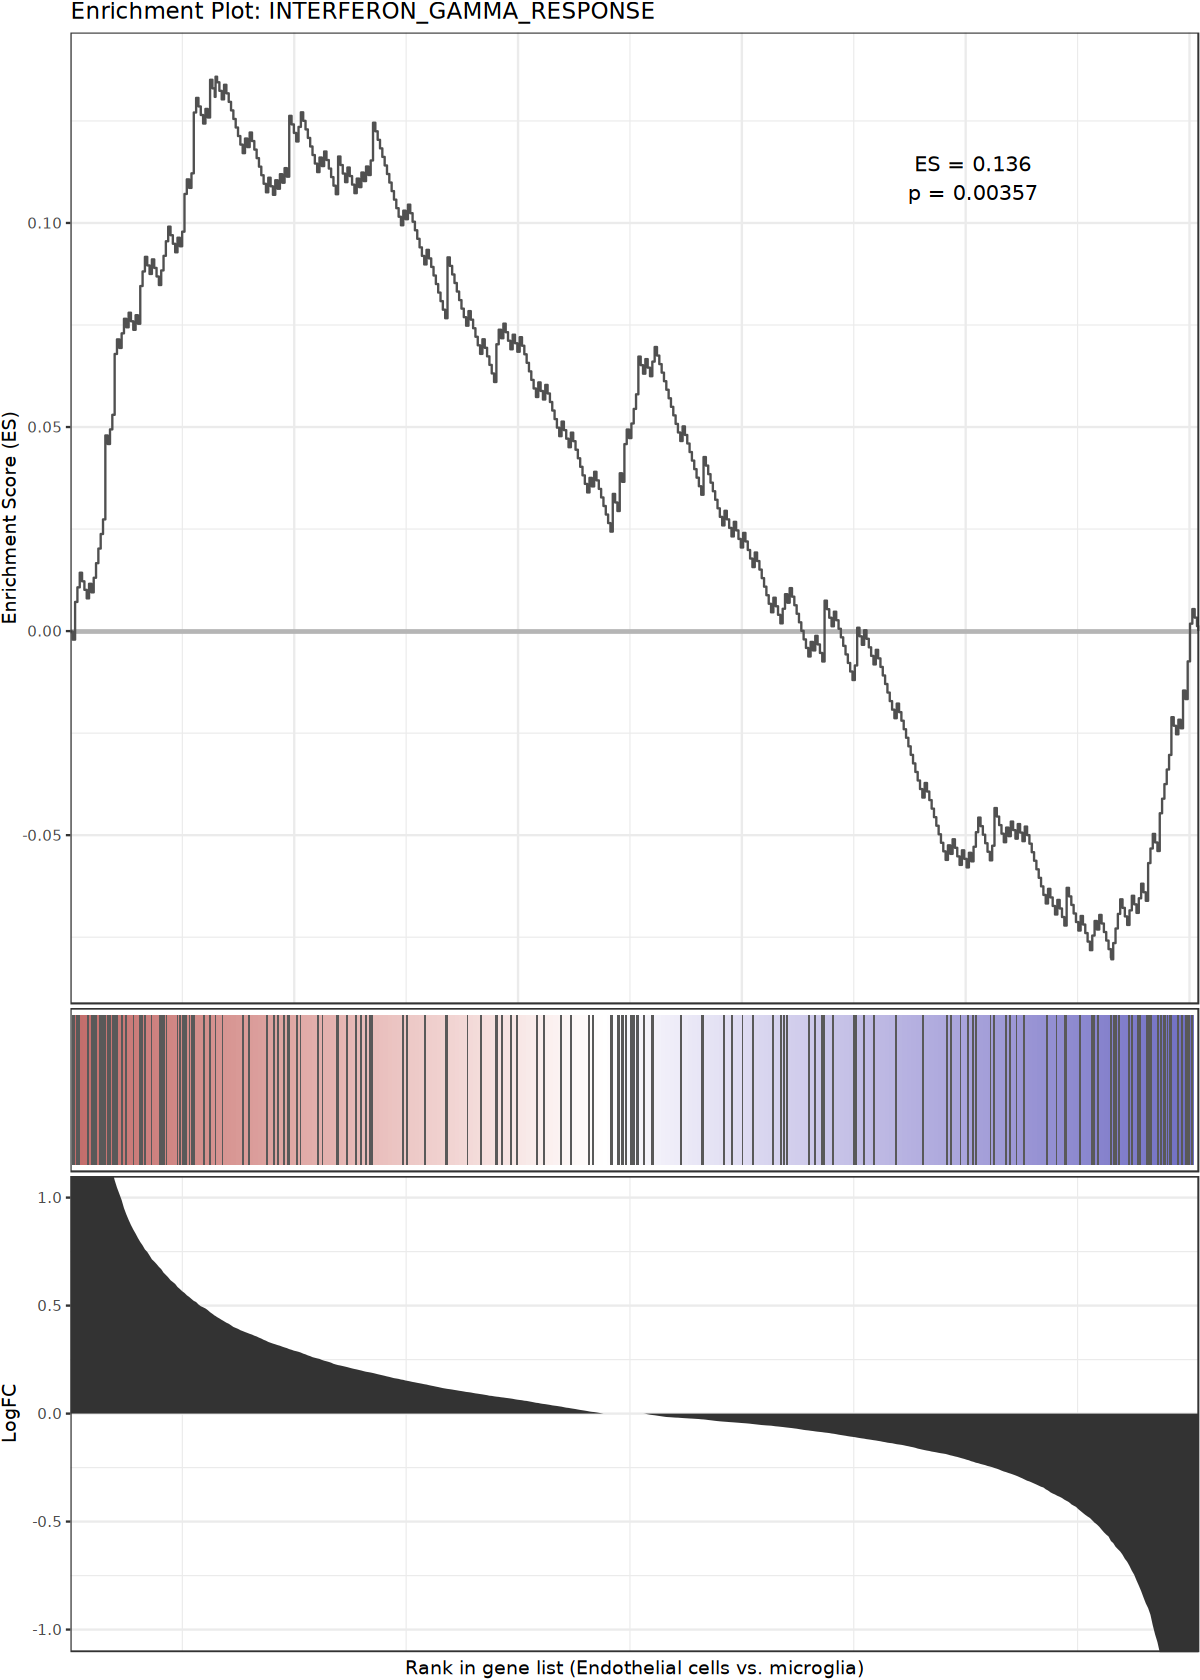

In [264]:
GSEAplot(
  pbmc_2, 
  ident.1 = "Endothelial cells",
  ident.2 = "microglia", 
  title = "INTERFERON_GAMMA_RESPONSE",
  geneset = hall50$mouse$HALLMARK_INTERFERON_GAMMA_RESPONSE
)

For GSEA analysis, I will use another package that use sparse matrix.\
GSEAPlot uses FetchData of Seurat to retrieve data matrix and convert it\
to dense matrix which causes memory issues.

An an alternative, I find "escape" package to use different gene set\
enrichment analysis methods on single cell objects.

Another alternative is the "singscore" package which has nice utilities.\
It can be used to calculate gene set scores for single cell and bullk samples.

I will also generate custom functions from the Ming Tang's course\
that I found on the internet. It performs diff. analysis and obtains\
wilcoxon statistics for pair wise comparison of clusters and \
reformat this output to feed in fgsea package'S function and \
generate output plots.

In [269]:
ls()

[1] "GBonilla_seurat"                    "matr"                              
 [3] "my_colours"                         "my_seurat_extend_scCustomize_lib"  
 [5] "my_seurat_extend_with_domc_package" "my_theme"                          
 [7] "p1"                                 "pbmc"                              
 [9] "pbmc_2"                             "result"                            
[11] "terms"                              "terms2"                            
[13] "terms3"

In [270]:
GBonilla_seurat %>% saveRDS(here::here('r_objects', 'GBonilla_seurat.RDS'))

=======================================

I installed new R package using guix now need to add the lib path again:

In [277]:
my_seurat_extend_with_domc_package

[1] "/home/ykazci/.guix-extra-profiles/seurat_extend_w_DOMC/seurat_extend_w_DOMC/site-library"

In [278]:
.libPaths(new = my_seurat_extend_with_domc_package, include.site = FALSE)

In [279]:
library(escape)

In [280]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] escape_2.2.1       ggpubr_0.6.0       doMC_1.3.8         iterators_1.0.14  
 [5] foreach_1.5.2      tidyr_1.3.1        rlist_0.4.6.2      RColorBrewer_1.1-3
 [9] viridis_0.6.5      viridisLite_0.4.2  mosaic_1.9.1       mosaicData_0.20.4 
 [ reached getOpti

In [ ]:
clusterProfiler::